# Importing Libraries

In [928]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from skmultilearn.adapt import MLkNN
from skmultilearn.problem_transform import LabelPowerset
from skmultilearn.problem_transform import ClassifierChain
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Importing Both Datasets

In [356]:
data_Match = pd.read_csv('Match.csv')
data_Player = pd.read_csv('Player_performance.csv')

# Match Data

In [357]:
data_Match.head()

,Unnamed: 0,Match_id,Team1,Team2,Gender,Date,Season,Series/Competition,Match_number,Venue,...,Umpire1,Umpire2,Reserve_umpire,Tv_umpire,Match_referee,Winner,Winner_runs,Winner_wickets,Method,Outcome
0,0,1000887,Australia,Pakistan,male,2017/01/13,2016/17,Pakistan in Australia ODI Series,1.0,"""Brisbane Cricket Ground",...,MD Martell,C Shamshuddin,SJ Nogajski,CB Gaffaney,JJ Crowe,Australia,92.0,NaN,NaN,NaN
1,1,1000889,Australia,Pakistan,male,2017/01/15,2016/17,Pakistan in Australia ODI Series,2.0,Melbourne Cricket Ground,...,CB Gaffaney,P Wilson,SJ Nogajski,C Shamshuddin,JJ Crowe,Pakistan,NaN,6.0,NaN,NaN
2,2,1000891,Australia,Pakistan,male,2017/01/19,2016/17,Pakistan in Australia ODI Series,3.0,Western Australia Cricket Association Ground,...,SD Fry,C Shamshuddin,P Wilson,CB Gaffaney,JJ Crowe,Australia,NaN,7.0,NaN,NaN
3,3,1000893,Australia,Pakistan,male,2017/01/22,2016/17,Pakistan in Australia ODI Series,4.0,Sydney Cricket Ground,...,CB Gaffaney,MD Martell,P Wilson,C Shamshuddin,JJ Crowe,Australia,86.0,NaN,NaN,NaN
4,4,1000895,Australia,Pakistan,male,2017/01/26,2016/17,Pakistan in Australia ODI Series,5.0,Adelaide Oval,...,SD Fry,C Shamshuddin,SJ Nogajski,CB Gaffaney,JJ Crowe,Australia,57.0,NaN,NaN,NaN


In [358]:
# Columns
print(data_Match.columns)

Index(['Unnamed: 0', 'Match_id', 'Team1', 'Team2', 'Gender', 'Date', 'Season',
       'Series/Competition', 'Match_number', 'Venue', 'City', 'Neutral_venue',
       'Toss_winner', 'Toss_decision', 'Player_of_match', 'Umpire1', 'Umpire2',
       'Reserve_umpire', 'Tv_umpire', 'Match_referee', 'Winner', 'Winner_runs',
       'Winner_wickets', 'Method', 'Outcome'],
      dtype='object')


# Player Performance Data

In [359]:
data_Player.head()

,Unnamed: 0,Matchid,Players_1,BattingOrder_1,inning_bat_1,Bat_Bowler_1,Bat_Dismissal_1,Bat_Runs_1,4s_1,6s_1,...,BattingTeam_22,inning_bowl_22,Over_22,Runs_22,Wicket_22,Maiden_22,extra_22,fowRuns_22,wicketNumber_22,fowOver_22
0,0,1004261,G Malla,1,1.0,T van der Gugten,bowled,11.0,2.0,0.0,...,-,-,-,-,-,-,-,-,-,-
1,1,1004269,C Carter,1,1.0,LN Oluoch,caught,41.0,4.0,1.0,...,Kenya,1.0,6.1,29.0,3.0,0.0,0.0,-,-,-
2,2,1004283,KJ Coetzer,1,1.0,Ehsan Khan,lbw,53.0,6.0,2.0,...,-,-,-,-,-,-,-,-,-,-
3,3,1004285,KJ Coetzer,1,1.0,Tanveer Ahmed,caught and bowled,48.0,8.0,2.0,...,Hong Kong,1.0,10.0,46.0,3.0,1.0,7.0,-,-,-
4,4,1007649,PJ Moor,1,1.0,BB Sran,lbw,3.0,0.0,0.0,...,-,-,-,-,-,-,-,-,-,-


In [360]:
# Basicall this data set contains all the information of 22 player, 11 from 1 team and 11 from opposition team
print(list(data_Player.columns))

['Unnamed: 0', 'Matchid', 'Players_1', 'BattingOrder_1', 'inning_bat_1', 'Bat_Bowler_1', 'Bat_Dismissal_1', 'Bat_Runs_1', '4s_1', '6s_1', 'Ball Faced_1', 'Dots_1', 'BattingTeam_1', 'inning_bowl_1', 'Over_1', 'Runs_1', 'Wicket_1', 'Maiden_1', 'extra_1', 'fowRuns_1', 'wicketNumber_1', 'fowOver_1', 'Players_2', 'BattingOrder_2', 'inning_bat_2', 'Bat_Bowler_2', 'Bat_Dismissal_2', 'Bat_Runs_2', '4s_2', '6s_2', 'Ball Faced_2', 'Dots_2', 'BattingTeam_2', 'inning_bowl_2', 'Over_2', 'Runs_2', 'Wicket_2', 'Maiden_2', 'extra_2', 'fowRuns_2', 'wicketNumber_2', 'fowOver_2', 'Players_3', 'BattingOrder_3', 'inning_bat_3', 'Bat_Bowler_3', 'Bat_Dismissal_3', 'Bat_Runs_3', '4s_3', '6s_3', 'Ball Faced_3', 'Dots_3', 'BattingTeam_3', 'inning_bowl_3', 'Over_3', 'Runs_3', 'Wicket_3', 'Maiden_3', 'extra_3', 'fowRuns_3', 'wicketNumber_3', 'fowOver_3', 'Players_4', 'BattingOrder_4', 'inning_bat_4', 'Bat_Bowler_4', 'Bat_Dismissal_4', 'Bat_Runs_4', '4s_4', '6s_4', 'Ball Faced_4', 'Dots_4', 'BattingTeam_4', 'innin

# Data Cleaning and Arrangement

In [361]:
# Improving the match data by removing less important features

In [362]:
data_Match.columns

Index(['Unnamed: 0', 'Match_id', 'Team1', 'Team2', 'Gender', 'Date', 'Season',
       'Series/Competition', 'Match_number', 'Venue', 'City', 'Neutral_venue',
       'Toss_winner', 'Toss_decision', 'Player_of_match', 'Umpire1', 'Umpire2',
       'Reserve_umpire', 'Tv_umpire', 'Match_referee', 'Winner', 'Winner_runs',
       'Winner_wickets', 'Method', 'Outcome'],
      dtype='object')

In [363]:
newMatchData = pd.concat([data_Match['Match_id'],data_Match['Team1'],data_Match['Team2'],data_Match['Gender'],
                         data_Match['Date'],data_Match['Season'],data_Match['Series/Competition'],data_Match['Venue'],
                         data_Match['Winner'],data_Match['Winner_runs']],axis=1,join='inner')

In [364]:
# Final Match Data.
newMatchData.head()

,Match_id,Team1,Team2,Gender,Date,Season,Series/Competition,Venue,Winner,Winner_runs
0,1000887,Australia,Pakistan,male,2017/01/13,2016/17,Pakistan in Australia ODI Series,"""Brisbane Cricket Ground",Australia,92.0
1,1000889,Australia,Pakistan,male,2017/01/15,2016/17,Pakistan in Australia ODI Series,Melbourne Cricket Ground,Pakistan,NaN
2,1000891,Australia,Pakistan,male,2017/01/19,2016/17,Pakistan in Australia ODI Series,Western Australia Cricket Association Ground,Australia,NaN
3,1000893,Australia,Pakistan,male,2017/01/22,2016/17,Pakistan in Australia ODI Series,Sydney Cricket Ground,Australia,86.0
4,1000895,Australia,Pakistan,male,2017/01/26,2016/17,Pakistan in Australia ODI Series,Adelaide Oval,Australia,57.0


In [926]:
newMatchData.columns

Index(['Match_id', 'Team1', 'Team2', 'Gender', 'Date', 'Season',
       'Series/Competition', 'Venue', 'Winner', 'Winner_runs'],
      dtype='object')

In [365]:
# Now for the Feature selection process in Player Performance date,
# the concpet of correlation matrix comes in picture.

In [366]:
# plt.matshow(data_Player.corr())
# plt.show()

In [367]:
data_Player.corr() 
# In this correaltion matrix, we can see that some other important features are not present, like..
# 'Bat_Dismissal_1', 'Over_1', 'Runs_1', 'Wicket_1', 'Maiden_1', 'extra_1',
# as these features also have values, but at certains places in out dataset the values are like '-', in this format,
# thats why now we need to do simple one hot encoding over the above features.

,Unnamed: 0,Matchid,BattingOrder_1,inning_bat_1,Bat_Runs_1,4s_1,6s_1,Ball Faced_1,Dots_1,inning_bowl_1,...,inning_bat_13,inning_bowl_13,inning_bat_14,inning_bowl_14,inning_bat_15,inning_bowl_15,inning_bat_16,inning_bowl_16,inning_bat_17,inning_bowl_17
Unnamed: 0,1.000000,0.012005,NaN,NaN,0.021528,0.004146,0.013105,0.033368,0.029215,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Matchid,0.012005,1.000000,NaN,NaN,0.020216,0.005882,0.050506,-0.004910,-0.037443,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BattingOrder_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
inning_bat_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bat_Runs_1,0.021528,0.020216,NaN,NaN,1.000000,0.908847,0.604578,0.918391,0.775549,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4s_1,0.004146,0.005882,NaN,NaN,0.908847,1.000000,0.419032,0.803541,0.689585,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6s_1,0.013105,0.050506,NaN,NaN,0.604578,0.419032,1.000000,0.404254,0.290248,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ball Faced_1,0.033368,-0.004910,NaN,NaN,0.918391,0.803541,0.404254,1.000000,0.949513,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dots_1,0.029215,-0.037443,NaN,NaN,0.775549,0.689585,0.290248,0.949513,1.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
inning_bowl_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [941]:
data_Player.corr().iloc[:,:20]

,Unnamed: 0,Matchid,BattingOrder_1,inning_bat_1,Bat_Runs_1,4s_1,6s_1,Ball Faced_1,Dots_1,inning_bowl_1,BattingOrder_2,inning_bat_2,Bat_Runs_2,4s_2,6s_2,Ball Faced_2,Dots_2,inning_bowl_2,BattingOrder_3,inning_bat_3
Unnamed: 0,1.000000,0.012005,NaN,NaN,0.021528,0.004146,0.013105,0.033368,0.029215,NaN,NaN,NaN,0.013558,0.002353,0.008861,-0.003720,-0.030800,NaN,NaN,NaN
Matchid,0.012005,1.000000,NaN,NaN,0.020216,0.005882,0.050506,-0.004910,-0.037443,NaN,NaN,NaN,-0.004828,-0.009008,0.038453,-0.025959,-0.047270,NaN,NaN,NaN
BattingOrder_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
inning_bat_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bat_Runs_1,0.021528,0.020216,NaN,NaN,1.000000,0.908847,0.604578,0.918391,0.775549,NaN,NaN,NaN,0.042721,0.060152,0.031114,0.001120,-0.031078,NaN,NaN,NaN
4s_1,0.004146,0.005882,NaN,NaN,0.908847,1.000000,0.419032,0.803541,0.689585,NaN,NaN,NaN,0.053892,0.074526,0.045794,0.011262,-0.019539,NaN,NaN,NaN
6s_1,0.013105,0.050506,NaN,NaN,0.604578,0.419032,1.000000,0.404254,0.290248,NaN,NaN,NaN,0.014458,0.035235,0.026653,-0.029682,-0.058785,NaN,NaN,NaN
Ball Faced_1,0.033368,-0.004910,NaN,NaN,0.918391,0.803541,0.404254,1.000000,0.949513,NaN,NaN,NaN,0.015126,0.031338,-0.007551,0.002497,-0.007553,NaN,NaN,NaN
Dots_1,0.029215,-0.037443,NaN,NaN,0.775549,0.689585,0.290248,0.949513,1.000000,NaN,NaN,NaN,-0.012884,0.006495,-0.038553,-0.002736,0.009013,NaN,NaN,NaN
inning_bowl_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# - One hot encoding

In [370]:
categorical_cols = data_Player.loc[:,data_Player.dtypes == object ].columns
print(list(categorical_cols))

['Players_1', 'Bat_Bowler_1', 'Bat_Dismissal_1', 'BattingTeam_1', 'Over_1', 'Runs_1', 'Wicket_1', 'Maiden_1', 'extra_1', 'fowRuns_1', 'wicketNumber_1', 'fowOver_1', 'Players_2', 'Bat_Bowler_2', 'Bat_Dismissal_2', 'BattingTeam_2', 'Over_2', 'Runs_2', 'Wicket_2', 'Maiden_2', 'extra_2', 'fowRuns_2', 'wicketNumber_2', 'fowOver_2', 'Players_3', 'Bat_Bowler_3', 'Bat_Dismissal_3', 'BattingTeam_3', 'Over_3', 'Runs_3', 'Wicket_3', 'Maiden_3', 'extra_3', 'fowRuns_3', 'wicketNumber_3', 'fowOver_3', 'Players_4', 'BattingOrder_4', 'Bat_Bowler_4', 'Bat_Dismissal_4', 'Bat_Runs_4', '4s_4', '6s_4', 'Ball Faced_4', 'Dots_4', 'BattingTeam_4', 'Over_4', 'Runs_4', 'Wicket_4', 'Maiden_4', 'extra_4', 'fowRuns_4', 'wicketNumber_4', 'fowOver_4', 'Players_5', 'BattingOrder_5', 'Bat_Bowler_5', 'Bat_Dismissal_5', 'Bat_Runs_5', '4s_5', '6s_5', 'Ball Faced_5', 'Dots_5', 'BattingTeam_5', 'Over_5', 'Runs_5', 'Wicket_5', 'Maiden_5', 'extra_5', 'fowRuns_5', 'wicketNumber_5', 'fowOver_5', 'Players_6', 'BattingOrder_6', 

In [371]:
# Here bacially we are removing the columns player_1,2..., Bat_Bowler_1,2..., BattingTeam_1,2...
# as these are not important, we will apply the exnoding for player name seperatly.
finalCategList = []
for i in list(categorical_cols):
    if(i[:5]!= 'Playe' and i[:5]!='Bat_B' and i[:5]!='Batti'):
        finalCategList.append(i)
        
print(finalCategList)

['Bat_Dismissal_1', 'Over_1', 'Runs_1', 'Wicket_1', 'Maiden_1', 'extra_1', 'fowRuns_1', 'wicketNumber_1', 'fowOver_1', 'Bat_Dismissal_2', 'Over_2', 'Runs_2', 'Wicket_2', 'Maiden_2', 'extra_2', 'fowRuns_2', 'wicketNumber_2', 'fowOver_2', 'Bat_Dismissal_3', 'Over_3', 'Runs_3', 'Wicket_3', 'Maiden_3', 'extra_3', 'fowRuns_3', 'wicketNumber_3', 'fowOver_3', 'Bat_Dismissal_4', 'Bat_Runs_4', '4s_4', '6s_4', 'Ball Faced_4', 'Dots_4', 'Over_4', 'Runs_4', 'Wicket_4', 'Maiden_4', 'extra_4', 'fowRuns_4', 'wicketNumber_4', 'fowOver_4', 'Bat_Dismissal_5', 'Bat_Runs_5', '4s_5', '6s_5', 'Ball Faced_5', 'Dots_5', 'Over_5', 'Runs_5', 'Wicket_5', 'Maiden_5', 'extra_5', 'fowRuns_5', 'wicketNumber_5', 'fowOver_5', 'Bat_Dismissal_6', 'Bat_Runs_6', '4s_6', '6s_6', 'Ball Faced_6', 'Dots_6', 'Over_6', 'Runs_6', 'Wicket_6', 'Maiden_6', 'extra_6', 'fowRuns_6', 'wicketNumber_6', 'fowOver_6', 'Bat_Dismissal_7', 'Bat_Runs_7', '4s_7', '6s_7', 'Ball Faced_7', 'Dots_7', 'Over_7', 'Runs_7', 'Wicket_7', 'Maiden_7', 'ext

In [372]:
encoded_data_ = data_Player.copy()

label_encoder = LabelEncoder()

for col in finalCategList:
    encoded_data_[col] = label_encoder.fit_transform(data_Player[col])

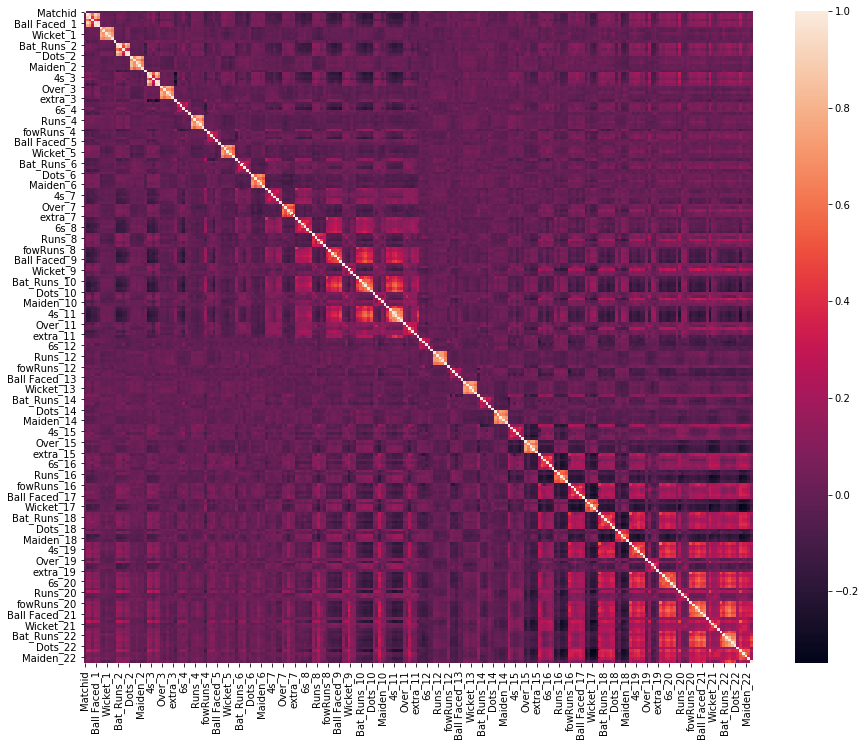

In [940]:
fig, ax = plt.subplots(figsize=(15,12))  
dataplot = sns.heatmap(encoded_data_.corr(),ax=ax)

In [373]:
# Now we will again check the corrlation matrix for feature selection part.

In [961]:
encoded_data_.corr().dropna()

,Matchid,Bat_Runs_1,4s_1,6s_1,Ball Faced_1,Dots_1,Over_1,Runs_1,Wicket_1,Maiden_1,...,4s_22,6s_22,Ball Faced_22,Dots_22,Over_22,Runs_22,Wicket_22,Maiden_22,extra_22,fowRuns_22
Matchid,1.000000,0.020216,0.005882,0.050506,-0.004910,-0.037443,-0.031203,-0.026432,-0.030347,-0.007554,...,0.002532,-0.000198,-0.000613,0.007824,-0.048003,-0.031832,-0.016790,-0.059082,-0.030911,0.024531
Bat_Runs_1,0.020216,1.000000,0.908847,0.604578,0.918391,0.775549,0.027941,0.008515,0.016228,0.006022,...,0.124365,0.156059,0.118201,0.135601,0.100894,0.296276,0.072857,0.046066,0.112915,0.088254
4s_1,0.005882,0.908847,1.000000,0.419032,0.803541,0.689585,0.050816,0.022031,0.018821,0.013394,...,0.130764,0.158194,0.114393,0.139627,0.110403,0.299579,0.071775,0.051632,0.122001,0.077739
6s_1,0.050506,0.604578,0.419032,1.000000,0.404254,0.290248,0.016428,0.017263,0.024223,0.006420,...,0.021206,0.028440,0.016492,0.007861,0.028444,0.150927,0.039218,0.027189,0.041451,0.010828
Ball Faced_1,-0.004910,0.918391,0.803541,0.404254,1.000000,0.949513,0.026626,0.003351,0.017165,0.018063,...,0.121276,0.151643,0.111170,0.137169,0.095700,0.257142,0.069738,0.048249,0.101670,0.090514
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Runs_22,-0.031832,0.296276,0.299579,0.150927,0.257142,0.207893,0.000798,-0.008716,0.010500,-0.012663,...,0.396926,0.442754,0.370653,0.387435,0.398768,1.000000,0.552412,0.482680,0.515661,0.289320
Wicket_22,-0.016790,0.072857,0.071775,0.039218,0.069738,0.057540,0.012835,0.014880,0.055561,0.019295,...,0.280567,0.317054,0.253200,0.269374,0.343433,0.552412,1.000000,0.633984,0.471543,0.174392
Maiden_22,-0.059082,0.046066,0.051632,0.027189,0.048249,0.053055,0.022448,0.006065,0.044260,0.024729,...,0.282630,0.325235,0.287587,0.287785,0.365698,0.482680,0.633984,1.000000,0.398290,0.169377
extra_22,-0.030911,0.112915,0.122001,0.041451,0.101670,0.092899,0.038941,0.036206,0.064017,0.040130,...,0.296087,0.353946,0.275183,0.289469,0.330449,0.515661,0.471543,0.398290,1.000000,0.207160


In [375]:
# In the above correlation matrix, we can see that the columns
# Bat_Runs_1,4s_1,6s_1,Ball Faced_1,Dots_1,Over_1,Runs_1,Wicket_1,Maiden_1,extra_1,fowRuns_1
# save good co-relation value.
# For Corelation,the value between 0.5 - 1 is considered as good value according to Pearson theory.

In [376]:
# Now we fill prepare the Player Data with these columns so that our model will become strong for the prediction.

In [377]:
NewPlayerData = encoded_data_
encoded_data_.iloc[:,:20]

,Unnamed: 0,Matchid,Players_1,BattingOrder_1,inning_bat_1,Bat_Bowler_1,Bat_Dismissal_1,Bat_Runs_1,4s_1,6s_1,Ball Faced_1,Dots_1,BattingTeam_1,inning_bowl_1,Over_1,Runs_1,Wicket_1,Maiden_1,extra_1,fowRuns_1
0,0,1004261,G Malla,1,1.0,T van der Gugten,0,11.0,2.0,0.0,12.0,8.0,Nepal,2.0,0,0,0,0,0,128
1,1,1004269,C Carter,1,1.0,LN Oluoch,1,41.0,4.0,1.0,62.0,41.0,Hong Kong,2.0,0,0,0,0,0,33
2,2,1004283,KJ Coetzer,1,1.0,Ehsan Khan,4,53.0,6.0,2.0,29.0,9.0,Scotland,2.0,0,0,0,0,0,245
3,3,1004285,KJ Coetzer,1,1.0,Tanveer Ahmed,2,48.0,8.0,2.0,41.0,28.0,Scotland,2.0,0,0,0,0,0,209
4,4,1007649,PJ Moor,1,1.0,BB Sran,4,3.0,0.0,0.0,5.0,3.0,Zimbabwe,2.0,0,0,0,0,0,227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1900,1900,997961,Mohammad Shahzad,1,1.0,KJ O'Brien,1,66.0,8.0,1.0,74.0,46.0,Afghanistan,2.0,0,0,0,0,0,19
1901,1901,997965,Mohammad Shahzad,1,1.0,PR Stirling,1,22.0,1.0,0.0,35.0,21.0,Afghanistan,2.0,0,0,0,0,0,199
1902,1902,997967,WTS Porterfield,1,1.0,Mirwais Ashraf,1,8.0,1.0,0.0,20.0,19.0,Ireland,2.0,0,0,0,0,0,154
1903,1903,997993,KJ Coetzer,1,1.0,Mohammad Shahzad (2),1,127.0,14.0,1.0,120.0,55.0,Scotland,2.0,0,0,0,0,0,124


In [378]:
l=['Matchi','Players_','Players_1','Players_2','BattingTeam_','BattingTeam_1','BattingTeam_2','Bat_Runs_','Bat_Runs_1','Bat_Runs_2','Dots_','Dots_1','Dots_2','4s_','4s_1','4s_2','6s_','6s_1','6s_2','Ball Faced_','Ball Faced_1','Ball Faced_2','Over_','Over_1','Over_2','Runs_','Runs_1','Runs_2','Wicket_','Wicket_1','Wicket_2','Maiden_','Maiden_1','Maiden_2','extra_','extra_1','extra_2','fowRuns_','fowRuns_1','fowRuns_2']
for i in encoded_data_:
    a=(i[:-1])
#     print(i,a)
    if(a not in l):
#         print('yyes',i)
        NewPlayerData.drop([str(i)],axis=1,inplace = True)

In [379]:
# Now this is our Final Player Performace Data
NewPlayerData.iloc[:,:20]

,Matchid,Players_1,Bat_Runs_1,4s_1,6s_1,Ball Faced_1,Dots_1,BattingTeam_1,Over_1,Runs_1,Wicket_1,Maiden_1,extra_1,fowRuns_1,Players_2,Bat_Runs_2,4s_2,6s_2,Ball Faced_2,Dots_2
0,1004261,G Malla,11.0,2.0,0.0,12.0,8.0,Nepal,0,0,0,0,0,128,AK Mandal,20.0,1.0,0.0,39.0,30.0
1,1004269,C Carter,41.0,4.0,1.0,62.0,41.0,Hong Kong,0,0,0,0,0,33,KD Shah,1.0,0.0,0.0,3.0,2.0
2,1004283,KJ Coetzer,53.0,6.0,2.0,29.0,9.0,Scotland,0,0,0,0,0,245,CD Wallace,14.0,1.0,1.0,8.0,4.0
3,1004285,KJ Coetzer,48.0,8.0,2.0,41.0,28.0,Scotland,0,0,0,0,0,209,MH Cross,13.0,1.0,0.0,22.0,16.0
4,1007649,PJ Moor,3.0,0.0,0.0,5.0,3.0,Zimbabwe,0,0,0,0,0,227,CJ Chibhabha,13.0,0.0,0.0,41.0,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1900,997961,Mohammad Shahzad,66.0,8.0,1.0,74.0,46.0,Afghanistan,0,0,0,0,0,19,Javed Ahmadi,29.0,3.0,0.0,42.0,26.0
1901,997965,Mohammad Shahzad,22.0,1.0,0.0,35.0,21.0,Afghanistan,0,0,0,0,0,199,Noor Ali Zadran,10.0,2.0,0.0,9.0,8.0
1902,997967,WTS Porterfield,8.0,1.0,0.0,20.0,19.0,Ireland,0,0,0,0,0,154,EC Joyce,160.0,19.0,3.0,148.0,72.0
1903,997993,KJ Coetzer,127.0,14.0,1.0,120.0,55.0,Scotland,0,0,0,0,0,124,CD Wallace,16.0,2.0,0.0,15.0,8.0


# Merging Both the Match and Player Performance Dataset

In [380]:
l1=[]
l2=[]
for y,i in enumerate(newMatchData['Match_id']):
    #print(i)
    for j,x in enumerate(NewPlayerData['Matchid']):
        if(i==x):
            #print(data_Player.iloc[j])
            #print(newMatch_Data.iloc[y])
            l1.append(list(NewPlayerData.iloc[j]))
            l2.append(list(newMatchData.iloc[y]))

In [381]:
Match = pd.DataFrame(l2)
Player = pd.DataFrame(l1)

In [382]:
Match.columns = newMatchData.columns
Player.columns = NewPlayerData.columns

In [383]:
Final_Data = pd.concat([Match, Player], axis=1, join='inner')

In [962]:
Final_Data.head()
# This is our final data set, which has all the details like, team names, series, players data, etc.

,Match_id,Team1,Team2,Gender,Date,Season,Series/Competition,Venue,Winner,Winner_runs,...,6s_22,Ball Faced_22,Dots_22,BattingTeam_22,Over_22,Runs_22,Wicket_22,Maiden_22,extra_22,fowRuns_22
0,1004261,Netherlands,Nepal,male,2016/08/13,2016,"""ICC World Cricket League Championship",VRA Ground,Netherlands,NaN,...,0,0,0,-,0,0,0,0,0,0
1,1004269,Kenya,Hong Kong,male,2016/11/20,2016/17,"""ICC World Cricket League Championship",Gymkhana Club Ground,Hong Kong,39.0,...,1,13,2,Kenya,13,22,4,1,1,0
2,1004283,Scotland,Hong Kong,male,2016/09/08,2016,Hong Kong in Scotland ODI Series,"""Grange Cricket Club Ground",NaN,NaN,...,0,0,0,-,0,0,0,0,0,0
3,1004285,Scotland,Hong Kong,male,2016/09/10,2016,Hong Kong in Scotland ODI Series,"""Grange Cricket Club Ground",Scotland,53.0,...,1,2,2,Hong Kong,2,41,4,2,16,0
4,1007649,Zimbabwe,India,male,2016/06/11,2016,India in Zimbabwe ODI Series,Harare Sports Club,India,NaN,...,0,0,0,-,0,0,0,0,0,0


In [945]:
Final_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1905 entries, 0 to 1904
Columns: 297 entries, Match_id to fowRuns_22
dtypes: float64(16), int64(229), object(52)
memory usage: 4.3+ MB


In [946]:
Final_Data.describe()

,Match_id,Winner_runs,Matchid,Bat_Runs_1,4s_1,6s_1,Ball Faced_1,Dots_1,Over_1,Runs_1,...,4s_22,6s_22,Ball Faced_22,Dots_22,Over_22,Runs_22,Wicket_22,Maiden_22,extra_22,fowRuns_22
count,1.905000e+03,891.000000,1.905000e+03,1905.000000,1905.000000,1905.000000,1905.000000,1905.000000,1905.000000,1905.000000,...,1905.000000,1905.000000,1905.000000,1905.000000,1905.000000,1905.000000,1905.000000,1905.000000,1905.000000,1905.000000
mean,6.442157e+05,67.112233,6.442157e+05,31.764304,3.442520,0.515486,38.300787,23.591601,2.723885,3.544882,...,0.451444,0.364304,6.597900,4.405249,6.731759,25.535958,1.677690,0.919685,5.145932,13.967979
std,2.858687e+05,55.643556,2.858687e+05,34.028590,3.613115,1.230263,34.670498,19.129840,7.228008,10.013500,...,0.758619,0.529176,11.826565,7.713731,8.636081,22.291185,1.485946,0.798736,5.795329,36.683170
min,2.252450e+05,1.000000,2.252450e+05,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.126940e+05,22.000000,4.126940e+05,6.000000,1.000000,0.000000,12.000000,8.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.949040e+05,54.000000,5.949040e+05,20.000000,2.000000,0.000000,28.000000,18.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,2.000000,25.000000,2.000000,1.000000,2.000000,0.000000
75%,9.035970e+05,96.000000,9.035970e+05,47.000000,5.000000,1.000000,55.000000,35.000000,0.000000,0.000000,...,1.000000,1.000000,6.000000,3.000000,9.000000,42.000000,3.000000,1.000000,11.000000,0.000000
max,1.185156e+06,282.000000,1.185156e+06,237.000000,24.000000,16.000000,162.000000,110.000000,38.000000,53.000000,...,7.000000,5.000000,37.000000,24.000000,30.000000,89.000000,7.000000,5.000000,18.000000,174.000000


In [385]:
# Final_Data.iloc[:,:20]

In [753]:
Selected_Player = []

# Training Testing and Prediction

# Targeting Player-1

In [949]:
data_player_1=pd.concat([Final_Data.iloc[:,11:23],Final_Data['Winner']],axis=1)
data_player_1

,Players_1,Bat_Runs_1,4s_1,6s_1,Ball Faced_1,Dots_1,BattingTeam_1,Over_1,Runs_1,Wicket_1,Maiden_1,extra_1,Winner
0,G Malla,11.0,2.0,0.0,12.0,8.0,Nepal,0,0,0,0,0,Netherlands
1,C Carter,41.0,4.0,1.0,62.0,41.0,Hong Kong,0,0,0,0,0,Hong Kong
2,KJ Coetzer,53.0,6.0,2.0,29.0,9.0,Scotland,0,0,0,0,0,NaN
3,KJ Coetzer,48.0,8.0,2.0,41.0,28.0,Scotland,0,0,0,0,0,Scotland
4,PJ Moor,3.0,0.0,0.0,5.0,3.0,Zimbabwe,0,0,0,0,0,India
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1900,Mohammad Shahzad,66.0,8.0,1.0,74.0,46.0,Afghanistan,0,0,0,0,0,Afghanistan
1901,Mohammad Shahzad,22.0,1.0,0.0,35.0,21.0,Afghanistan,0,0,0,0,0,Afghanistan
1902,WTS Porterfield,8.0,1.0,0.0,20.0,19.0,Ireland,0,0,0,0,0,Ireland
1903,KJ Coetzer,127.0,14.0,1.0,120.0,55.0,Scotland,0,0,0,0,0,Scotland


In [950]:
data_player_1 = data_player_1.dropna()
data_player_1.reset_index(inplace = True, drop = True)
data_player_1

,Players_1,Bat_Runs_1,4s_1,6s_1,Ball Faced_1,Dots_1,BattingTeam_1,Over_1,Runs_1,Wicket_1,Maiden_1,extra_1,Winner
0,G Malla,11.0,2.0,0.0,12.0,8.0,Nepal,0,0,0,0,0,Netherlands
1,C Carter,41.0,4.0,1.0,62.0,41.0,Hong Kong,0,0,0,0,0,Hong Kong
2,KJ Coetzer,48.0,8.0,2.0,41.0,28.0,Scotland,0,0,0,0,0,Scotland
3,PJ Moor,3.0,0.0,0.0,5.0,3.0,Zimbabwe,0,0,0,0,0,India
4,H Masakadza,9.0,1.0,0.0,17.0,14.0,Zimbabwe,0,0,0,0,0,India
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1866,Mohammad Shahzad,66.0,8.0,1.0,74.0,46.0,Afghanistan,0,0,0,0,0,Afghanistan
1867,Mohammad Shahzad,22.0,1.0,0.0,35.0,21.0,Afghanistan,0,0,0,0,0,Afghanistan
1868,WTS Porterfield,8.0,1.0,0.0,20.0,19.0,Ireland,0,0,0,0,0,Ireland
1869,KJ Coetzer,127.0,14.0,1.0,120.0,55.0,Scotland,0,0,0,0,0,Scotland


In [951]:
target = []
for i,val in enumerate(data_player_1['BattingTeam_1']):
    if(str(val)==str(data_player_1['Winner'][i])):
        target.append(1)
    else:
        target.append(0)
    

In [952]:
Final_Data_P1 = pd.concat([data_player_1,pd.DataFrame({'TargetF':target})],axis=1)
Final_Data_P1

,Players_1,Bat_Runs_1,4s_1,6s_1,Ball Faced_1,Dots_1,BattingTeam_1,Over_1,Runs_1,Wicket_1,Maiden_1,extra_1,Winner,TargetF
0,G Malla,11.0,2.0,0.0,12.0,8.0,Nepal,0,0,0,0,0,Netherlands,0
1,C Carter,41.0,4.0,1.0,62.0,41.0,Hong Kong,0,0,0,0,0,Hong Kong,1
2,KJ Coetzer,48.0,8.0,2.0,41.0,28.0,Scotland,0,0,0,0,0,Scotland,1
3,PJ Moor,3.0,0.0,0.0,5.0,3.0,Zimbabwe,0,0,0,0,0,India,0
4,H Masakadza,9.0,1.0,0.0,17.0,14.0,Zimbabwe,0,0,0,0,0,India,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1866,Mohammad Shahzad,66.0,8.0,1.0,74.0,46.0,Afghanistan,0,0,0,0,0,Afghanistan,1
1867,Mohammad Shahzad,22.0,1.0,0.0,35.0,21.0,Afghanistan,0,0,0,0,0,Afghanistan,1
1868,WTS Porterfield,8.0,1.0,0.0,20.0,19.0,Ireland,0,0,0,0,0,Ireland,1
1869,KJ Coetzer,127.0,14.0,1.0,120.0,55.0,Scotland,0,0,0,0,0,Scotland,1


In [953]:
categorical_cols_P1 = Final_Data_P1.loc[:,Final_Data_P1.dtypes == object ].columns
print(categorical_cols_P1)

Index(['Players_1', 'BattingTeam_1', 'Winner'], dtype='object')


In [954]:
encoded_data_player_1 = Final_Data_P1.copy()

label_encoder_P1 = LabelEncoder()

# for col in categorical_cols_P1:
    
#     encoded_data_player_1[col]= label_encoder_P1.fit_transform(Final_Data_P1[col]) 
#     encoded_data_player_1[col]= label_encoder_P1.inverse_transform(encoded_data_player_1[col])
#     print(label_encoder_P1.fit_transform(Final_Data_P1[col]))


encoded_data_player_1['BattingTeam_1']= label_encoder_P1.fit_transform(Final_Data_P1['BattingTeam_1']) 
encoded_data_player_1['Winner']= label_encoder_P1.fit_transform(Final_Data_P1['Winner']) 
encoded_data_player_1['Players_1']= label_encoder_P1.fit_transform(Final_Data_P1['Players_1']) 

In [955]:
encoded_data_player_1

,Players_1,Bat_Runs_1,4s_1,6s_1,Ball Faced_1,Dots_1,BattingTeam_1,Over_1,Runs_1,Wicket_1,Maiden_1,extra_1,Winner,TargetF
0,106,11.0,2.0,0.0,12.0,8.0,42,0,0,0,0,0,40,0
1,57,41.0,4.0,1.0,62.0,41.0,25,0,0,0,0,0,23,1
2,174,48.0,8.0,2.0,41.0,28.0,57,0,0,0,0,0,55,1
3,273,3.0,0.0,0.0,5.0,3.0,73,0,0,0,0,0,24,0
4,115,9.0,1.0,0.0,17.0,14.0,73,0,0,0,0,0,24,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1866,245,66.0,8.0,1.0,74.0,46.0,1,0,0,0,0,0,1,1
1867,245,22.0,1.0,0.0,35.0,21.0,1,0,0,0,0,0,1,1
1868,363,8.0,1.0,0.0,20.0,19.0,27,0,0,0,0,0,25,1
1869,174,127.0,14.0,1.0,120.0,55.0,57,0,0,0,0,0,55,1


In [956]:
# label_encoder_P1.inverse_transform(encoded_data_player_1['Players_1'])

In [957]:
X = encoded_data_player_1.iloc[:, :]
y = Final_Data_P1.iloc[:,13:]


In [958]:
X=X.drop(['BattingTeam_1','Winner','TargetF'],axis=1)

In [960]:
y

,TargetF
0,0
1,1
2,1
3,0
4,0
...,...
1866,1
1867,1
1868,1
1869,1


In [764]:
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=42)

classifier = BinaryRelevance(GaussianNB())

classifier.fit(X_train, y_train)

BinaryRelevance(classifier=GaussianNB(priors=None, var_smoothing=1e-09),
                require_dense=[True, True])

In [765]:
plus = classifier.predict(X_test)
plus = pd.DataFrame(plus.toarray())

In [766]:
plus

,0
0,1
1,0
2,1
3,1
4,0
...,...
370,0
371,0
372,0
373,0


In [767]:
X_test['Players_1']= label_encoder_P1.inverse_transform(X_test['Players_1'])


C:\Users\harsh\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [768]:
accuracy_p1 = accuracy_score(y_test,plus[0])
print(accuracy_p1)

0.5226666666666666


In [769]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=plus[0])
precision = precision_score(y_test, plus[0])
recall = recall_score(y_test, plus[0])
print(conf_matrix,precision,recall,f1_score)

[[135  45]
 [134  61]] 0.5754716981132075 0.3128205128205128 0.4053156146179402


In [770]:
final_L = []

for i,val in enumerate(plus[0]):
   
    if(val==1):

         final_L.append([X_test.iloc[i,:]['Players_1'],X_test.iloc[i,:]['Bat_Runs_1']])

In [771]:
def Sort(sub_li):
    sub_li.sort(key = lambda x: x[1])
    return sub_li
  
print(Sort(final_L))

[['Mohammad Hafeez', 4.0], ['SR Watson', 5.0], ['L Vincent', 18.0], ['Zeeshan Siddiqui', 20.0], ['NAT Watkins', 33.0], ['SR Watson', 34.0], ['E Lewis', 35.0], ['RG Mukasa', 37.0], ['WU Tharanga', 40.0], ['Tamim Iqbal', 40.0], ['S Sohal', 43.0], ['MJ Guptill', 44.0], ['DJ Harris', 47.0], ['CH Gayle', 48.0], ['CH Gayle', 49.0], ['ML Hayden', 49.0], ['AJ Finch', 50.0], ['Salman Butt', 50.0], ['Manpreet Singh', 50.0], ['JJ Peirson', 51.0], ['PJ Moor', 52.0], ['NC Dodd', 52.0], ['RG Sharma', 52.0], ['V Sehwag', 52.0], ['Q de Kock', 53.0], ['LMP Simmons', 53.0], ['R Gunasekera', 54.0], ['MDKJ Perera', 56.0], ['Salman Butt', 57.0], ['Kamran Akmal', 57.0], ['Imran Nazir', 57.0], ['Tamim Iqbal', 58.0], ['SR Watson', 59.0], ['Tamim Iqbal', 60.0], ['AJ Strauss', 61.0], ['TT Beaumont', 61.0], ['JJ Roy', 63.0], ['AJ Strauss', 63.0], ['Sagar Pun', 64.0], ['AN Cook', 64.0], ['WU Tharanga', 64.0], ['MS Wade', 64.0], ['MM Lanning', 64.0], ['MEK Hussey', 65.0], ['L Lee', 65.0], ['HM Amla', 66.0], ['SR W

In [772]:
# Selected Player - RG Sharma
Selected_Player.append(final_L[len(final_L)-1][0])

In [773]:
Selected_Player

['RG Sharma']

# Targeting Player-2

In [774]:
data_player_2=pd.concat([Final_Data.iloc[:,24:36],Final_Data['Winner']],axis=1)
data_player_2

,Players_2,Bat_Runs_2,4s_2,6s_2,Ball Faced_2,Dots_2,BattingTeam_2,Over_2,Runs_2,Wicket_2,Maiden_2,extra_2,Winner
0,AK Mandal,20.0,1.0,0.0,39.0,30.0,Nepal,0,0,0,0,0,Netherlands
1,KD Shah,1.0,0.0,0.0,3.0,2.0,Hong Kong,0,0,0,0,0,Hong Kong
2,CD Wallace,14.0,1.0,1.0,8.0,4.0,Scotland,0,0,0,0,0,NaN
3,MH Cross,13.0,1.0,0.0,22.0,16.0,Scotland,0,0,0,0,0,Scotland
4,CJ Chibhabha,13.0,0.0,0.0,41.0,38.0,Zimbabwe,29,5,1,2,4,India
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1900,Javed Ahmadi,29.0,3.0,0.0,42.0,26.0,Afghanistan,19,7,1,1,1,Afghanistan
1901,Noor Ali Zadran,10.0,2.0,0.0,9.0,8.0,Afghanistan,0,0,0,0,0,Afghanistan
1902,EC Joyce,160.0,19.0,3.0,148.0,72.0,Ireland,0,0,0,0,0,Ireland
1903,CD Wallace,16.0,2.0,0.0,15.0,8.0,Scotland,0,0,0,0,0,Scotland


In [775]:
data_player_2 = data_player_2.dropna()
data_player_2.reset_index(inplace = True, drop = True)
data_player_2

,Players_2,Bat_Runs_2,4s_2,6s_2,Ball Faced_2,Dots_2,BattingTeam_2,Over_2,Runs_2,Wicket_2,Maiden_2,extra_2,Winner
0,AK Mandal,20.0,1.0,0.0,39.0,30.0,Nepal,0,0,0,0,0,Netherlands
1,KD Shah,1.0,0.0,0.0,3.0,2.0,Hong Kong,0,0,0,0,0,Hong Kong
2,MH Cross,13.0,1.0,0.0,22.0,16.0,Scotland,0,0,0,0,0,Scotland
3,CJ Chibhabha,13.0,0.0,0.0,41.0,38.0,Zimbabwe,29,5,1,2,4,India
4,CJ Chibhabha,21.0,1.0,0.0,24.0,16.0,Zimbabwe,33,24,2,2,2,India
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1866,Javed Ahmadi,29.0,3.0,0.0,42.0,26.0,Afghanistan,19,7,1,1,1,Afghanistan
1867,Noor Ali Zadran,10.0,2.0,0.0,9.0,8.0,Afghanistan,0,0,0,0,0,Afghanistan
1868,EC Joyce,160.0,19.0,3.0,148.0,72.0,Ireland,0,0,0,0,0,Ireland
1869,CD Wallace,16.0,2.0,0.0,15.0,8.0,Scotland,0,0,0,0,0,Scotland


In [776]:
target_p2 = []

for i,val in enumerate(data_player_2['BattingTeam_2']):

    if(str(val)==str(data_player_2['Winner'][i])):
        target_p2.append(1)
    else:
        target_p2.append(0)
        


In [777]:
Final_Data_P2 = pd.concat([data_player_2,pd.DataFrame({'TargetF':target_p2})],axis=1)
Final_Data_P2

,Players_2,Bat_Runs_2,4s_2,6s_2,Ball Faced_2,Dots_2,BattingTeam_2,Over_2,Runs_2,Wicket_2,Maiden_2,extra_2,Winner,TargetF
0,AK Mandal,20.0,1.0,0.0,39.0,30.0,Nepal,0,0,0,0,0,Netherlands,0
1,KD Shah,1.0,0.0,0.0,3.0,2.0,Hong Kong,0,0,0,0,0,Hong Kong,1
2,MH Cross,13.0,1.0,0.0,22.0,16.0,Scotland,0,0,0,0,0,Scotland,1
3,CJ Chibhabha,13.0,0.0,0.0,41.0,38.0,Zimbabwe,29,5,1,2,4,India,0
4,CJ Chibhabha,21.0,1.0,0.0,24.0,16.0,Zimbabwe,33,24,2,2,2,India,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1866,Javed Ahmadi,29.0,3.0,0.0,42.0,26.0,Afghanistan,19,7,1,1,1,Afghanistan,1
1867,Noor Ali Zadran,10.0,2.0,0.0,9.0,8.0,Afghanistan,0,0,0,0,0,Afghanistan,1
1868,EC Joyce,160.0,19.0,3.0,148.0,72.0,Ireland,0,0,0,0,0,Ireland,1
1869,CD Wallace,16.0,2.0,0.0,15.0,8.0,Scotland,0,0,0,0,0,Scotland,1


In [778]:
encoded_data_player_2 = Final_Data_P2.copy()

label_encoder_P2 = LabelEncoder()


encoded_data_player_2['BattingTeam_2']= label_encoder_P2.fit_transform(Final_Data_P2['BattingTeam_2']) 
encoded_data_player_2['Winner']= label_encoder_P2.fit_transform(Final_Data_P2['Winner']) 
encoded_data_player_2['Players_2']= label_encoder_P2.fit_transform(Final_Data_P2['Players_2']) 

In [779]:
encoded_data_player_2

,Players_2,Bat_Runs_2,4s_2,6s_2,Ball Faced_2,Dots_2,BattingTeam_2,Over_2,Runs_2,Wicket_2,Maiden_2,extra_2,Winner,TargetF
0,19,20.0,1.0,0.0,39.0,30.0,42,0,0,0,0,0,40,0
1,203,1.0,0.0,0.0,3.0,2.0,25,0,0,0,0,0,23,1
2,253,13.0,1.0,0.0,22.0,16.0,57,0,0,0,0,0,55,1
3,72,13.0,0.0,0.0,41.0,38.0,73,29,5,1,2,4,24,0
4,72,21.0,1.0,0.0,24.0,16.0,73,33,24,2,2,2,24,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1866,189,29.0,3.0,0.0,42.0,26.0,1,19,7,1,1,1,1,1
1867,307,10.0,2.0,0.0,9.0,8.0,1,0,0,0,0,0,1,1
1868,107,160.0,19.0,3.0,148.0,72.0,27,0,0,0,0,0,25,1
1869,70,16.0,2.0,0.0,15.0,8.0,57,0,0,0,0,0,55,1


In [780]:
X = encoded_data_player_2.iloc[:, :]
y = Final_Data_P2.iloc[:,13:]

In [781]:
X=X.drop(['BattingTeam_2','Winner','TargetF'],axis=1)

In [782]:
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=42)

classifier = BinaryRelevance(GaussianNB())

classifier.fit(X_train, y_train)

BinaryRelevance(classifier=GaussianNB(priors=None, var_smoothing=1e-09),
                require_dense=[True, True])

In [783]:
plus = classifier.predict(X_test)
plus = pd.DataFrame(plus.toarray())
X_test['Players_2']= label_encoder_P2.inverse_transform(X_test['Players_2'])

C:\Users\harsh\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [785]:
accuracy_p2 = accuracy_score(y_test,plus[0])
print(accuracy_p2)

0.576


In [786]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=plus[0])
precision = precision_score(y_test, plus[0])
recall = recall_score(y_test, plus[0])

print(conf_matrix,precision,recall)

[[143  37]
 [122  73]] 0.6636363636363637 0.37435897435897436


In [787]:
final_L = []

for i,val in enumerate(plus[0]):
   
    if(val==1):
        
         final_L.append([X_test.iloc[i,:]['Players_2'],X_test.iloc[i,:]['Bat_Runs_2']])

In [788]:
print(Sort(final_L))

[['JH Kallis', 0.0], ['ST Jayasuriya', 0.0], ['V Sehwag', 1.0], ['PR Stirling', 1.0], ['SP Narine', 2.0], ['V Sehwag', 2.0], ['Mudassar Ali', 5.0], ['ST Jayasuriya', 6.0], ['CH Gayle', 6.0], ['NA Miyaji', 6.0], ['IK Pathan', 8.0], ['ST Jayasuriya', 9.0], ['Sikandar Raza', 11.0], ['RM Haq', 13.0], ['Zeeshan Maqsood', 18.0], ['Shamsur Rahman', 25.0], ['TM Dilshan', 35.0], ['CH Gayle', 35.0], ['CJ Chibhabha', 39.0], ['BB McCullum', 42.0], ['PR Stirling', 42.0], ['ML Hayden', 43.0], ['TM Dilshan', 43.0], ['AM Samad', 44.0], ['MB Loye', 45.0], ['V Kohli', 45.0], ['AA Obanda', 49.0], ['Steven Ryan Taylor', 50.0], ['V Sibanda', 51.0], ['PJ Hughes', 51.0], ['PR Stirling', 51.0], ['Usman Ghani', 51.0], ['S Luus', 52.0], ['CJ Chibhabha', 53.0], ['TM Dilshan', 53.0], ['Soumya Sarkar', 54.0], ['Q de Kock', 55.0], ['MM Ali', 55.0], ['TM Dilshan', 55.0], ['YSD Seneveratne', 57.0], ['Nasir Shafiq', 57.0], ['G Gambhir', 57.0], ['AD Hales', 57.0], ['Azhar Ali', 58.0], ['RT Ponting', 59.0], ['SA Asnodka

In [789]:
# Selected Player - SR Tendulkar
Selected_Player.append(final_L[len(final_L)-1][0])

In [790]:
Selected_Player

['RG Sharma', 'SR Tendulkar']

# Targeting Player-3

In [791]:
data_player_3=pd.concat([Final_Data.iloc[:,37:49],Final_Data['Winner']],axis=1)
data_player_3

,Players_3,Bat_Runs_3,4s_3,6s_3,Ball Faced_3,Dots_3,BattingTeam_3,Over_3,Runs_3,Wicket_3,Maiden_3,extra_3,Winner
0,S Vesawkar,14.0,0.0,0.0,70.0,63.0,Nepal,0,0,0,0,0,Netherlands
1,Babar Hayat,78.0,6.0,4.0,68.0,31.0,Hong Kong,0,0,0,0,0,Hong Kong
2,CS MacLeod,28.0,2.0,1.0,17.0,2.0,Scotland,0,0,0,0,0,NaN
3,CS MacLeod,102.0,8.0,1.0,106.0,50.0,Scotland,0,0,0,0,0,Scotland
4,H Masakadza,14.0,2.0,0.0,21.0,15.0,Zimbabwe,13,12,1,1,1,India
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1900,Rahmat Shah,14.0,0.0,0.0,25.0,12.0,Afghanistan,0,0,0,0,0,Afghanistan
1901,Rahmat Shah,48.0,4.0,0.0,70.0,37.0,Afghanistan,26,25,3,1,1,Afghanistan
1902,SP Terry,4.0,0.0,0.0,15.0,14.0,Ireland,0,0,0,0,0,Ireland
1903,CS MacLeod,20.0,3.0,0.0,32.0,22.0,Scotland,11,51,1,1,4,Scotland


In [792]:
data_player_3 = data_player_3.dropna()
data_player_3.reset_index(inplace = True, drop = True)
data_player_3

,Players_3,Bat_Runs_3,4s_3,6s_3,Ball Faced_3,Dots_3,BattingTeam_3,Over_3,Runs_3,Wicket_3,Maiden_3,extra_3,Winner
0,S Vesawkar,14.0,0.0,0.0,70.0,63.0,Nepal,0,0,0,0,0,Netherlands
1,Babar Hayat,78.0,6.0,4.0,68.0,31.0,Hong Kong,0,0,0,0,0,Hong Kong
2,CS MacLeod,102.0,8.0,1.0,106.0,50.0,Scotland,0,0,0,0,0,Scotland
3,H Masakadza,14.0,2.0,0.0,21.0,15.0,Zimbabwe,13,12,1,1,1,India
4,PJ Moor,1.0,0.0,0.0,9.0,8.0,Zimbabwe,0,0,0,0,0,India
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1866,Rahmat Shah,14.0,0.0,0.0,25.0,12.0,Afghanistan,0,0,0,0,0,Afghanistan
1867,Rahmat Shah,48.0,4.0,0.0,70.0,37.0,Afghanistan,26,25,3,1,1,Afghanistan
1868,SP Terry,4.0,0.0,0.0,15.0,14.0,Ireland,0,0,0,0,0,Ireland
1869,CS MacLeod,20.0,3.0,0.0,32.0,22.0,Scotland,11,51,1,1,4,Scotland


In [793]:
target_p3 = []

for i,val in enumerate(data_player_3['BattingTeam_3']):

    if(str(val)==str(data_player_3['Winner'][i])):
        target_p3.append(1)
    else:
        target_p3.append(0)
        

In [794]:
Final_Data_P3 = pd.concat([data_player_3,pd.DataFrame({'TargetF':target_p3})],axis=1)
Final_Data_P3

,Players_3,Bat_Runs_3,4s_3,6s_3,Ball Faced_3,Dots_3,BattingTeam_3,Over_3,Runs_3,Wicket_3,Maiden_3,extra_3,Winner,TargetF
0,S Vesawkar,14.0,0.0,0.0,70.0,63.0,Nepal,0,0,0,0,0,Netherlands,0
1,Babar Hayat,78.0,6.0,4.0,68.0,31.0,Hong Kong,0,0,0,0,0,Hong Kong,1
2,CS MacLeod,102.0,8.0,1.0,106.0,50.0,Scotland,0,0,0,0,0,Scotland,1
3,H Masakadza,14.0,2.0,0.0,21.0,15.0,Zimbabwe,13,12,1,1,1,India,0
4,PJ Moor,1.0,0.0,0.0,9.0,8.0,Zimbabwe,0,0,0,0,0,India,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1866,Rahmat Shah,14.0,0.0,0.0,25.0,12.0,Afghanistan,0,0,0,0,0,Afghanistan,1
1867,Rahmat Shah,48.0,4.0,0.0,70.0,37.0,Afghanistan,26,25,3,1,1,Afghanistan,1
1868,SP Terry,4.0,0.0,0.0,15.0,14.0,Ireland,0,0,0,0,0,Ireland,1
1869,CS MacLeod,20.0,3.0,0.0,32.0,22.0,Scotland,11,51,1,1,4,Scotland,1


In [795]:
encoded_data_player_3 = Final_Data_P3.copy()

label_encoder_P3 = LabelEncoder()


encoded_data_player_3['BattingTeam_3']= label_encoder_P3.fit_transform(Final_Data_P3['BattingTeam_3']) 
encoded_data_player_3['Winner']= label_encoder_P3.fit_transform(Final_Data_P3['Winner']) 
encoded_data_player_3['Players_3']= label_encoder_P3.fit_transform(Final_Data_P3['Players_3']) 

In [796]:
X = encoded_data_player_3.iloc[:, :]
y = Final_Data_P3.iloc[:,13:]

In [797]:
X=X.drop(['BattingTeam_3','Winner','TargetF'],axis=1)

In [798]:
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=42)

classifier = BinaryRelevance(GaussianNB())

classifier.fit(X_train, y_train)

BinaryRelevance(classifier=GaussianNB(priors=None, var_smoothing=1e-09),
                require_dense=[True, True])

In [799]:
plus = classifier.predict(X_test)
plus = pd.DataFrame(plus.toarray())
X_test['Players_3']= label_encoder_P3.inverse_transform(X_test['Players_3'])

C:\Users\harsh\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [800]:
accuracy_p3 = accuracy_score(y_test,plus[0])
print(accuracy_p3)

0.592


In [801]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=plus[0])
precision = precision_score(y_test, plus[0])
recall = recall_score(y_test, plus[0])

print(conf_matrix,precision,recall)

[[144  36]
 [117  78]] 0.6842105263157895 0.4


In [802]:
final_L = []

for i,val in enumerate(plus[0]):
   
    if(val==1):
        
         final_L.append([X_test.iloc[i,:]['Players_3'],X_test.iloc[i,:]['Bat_Runs_3']])

In [803]:
print(Sort(final_L))

[['MM Ali', 9.0], ['JP Duminy', 23.0], ['Mominul Haque', 31.0], ['TM Dilshan', 34.0], ['IK Pathan', 36.0], ['DG Crowley', 37.0], ['BDH Stevens', 37.0], ['F du Plessis', 39.0], ['C Munro', 40.0], ['MJ Clarke', 44.0], ['TM Dilshan', 45.0], ['Mohammad Hafeez', 45.0], ['CL White', 45.0], ['DPMD Jayawardene', 46.0], ['Kamran Akmal', 48.0], ['RT Ponting', 49.0], ['Nain Abidi', 50.0], ['AJ Strauss', 50.0], ['MK Pandey', 50.0], ['Hashmatullah Shahidi', 51.0], ['SK Raina', 52.0], ['MD Gunathilaka', 52.0], ['CO Obuya', 52.0], ['SK Raina', 52.0], ['Zhang Yu Fei', 53.0], ['CL White', 53.0], ['EC Joyce', 53.0], ['S Dhawan', 53.0], ['RR Sarwan', 55.0], ['BYA Mendis', 55.0], ['KS Williamson', 55.0], ['BJ Watling', 55.0], ['MM Lanning', 56.0], ['BB McCullum', 56.0], ['T Taibu', 56.0], ['RR Sarwan', 56.0], ['KS Williamson', 57.0], ['SK Raina', 57.0], ['MS Dhoni', 58.0], ['V Kohli', 58.0], ['SR Watson', 59.0], ['UT Khawaja', 59.0], ['KC Sangakkara', 59.0], ['SP Fleming', 60.0], ['KC Sangakkara', 61.0], 

In [804]:
# Selected Player -  F du Plessis
Selected_Player.append(final_L[len(final_L)-1][0])

In [805]:
Selected_Player

['RG Sharma', 'SR Tendulkar', 'F du Plessis']

# Targeting Player-4

In [806]:
data_player_4=pd.concat([Final_Data.iloc[:,50:62],Final_Data['Winner']],axis=1)
data_player_4

,Players_4,Bat_Runs_4,4s_4,6s_4,Ball Faced_4,Dots_4,BattingTeam_4,Over_4,Runs_4,Wicket_4,Maiden_4,extra_4,Winner
0,P Khadka,1,1,1,1,2,Nepal,9,5,1,1,5,Netherlands
1,Nizakat Khan,44,11,2,23,35,Hong Kong,0,0,0,0,0,Hong Kong
2,MH Cross,2,1,1,78,35,Scotland,0,0,0,0,0,NaN
3,MA Leask,23,2,1,49,8,Scotland,9,17,1,1,1,Scotland
4,CR Ervine,45,2,1,70,28,Zimbabwe,0,0,0,0,0,India
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1900,Samiullah Shenwari,48,11,1,62,10,Afghanistan,0,0,0,0,0,Afghanistan
1901,Samiullah Shenwari,14,2,1,51,11,Afghanistan,0,0,0,0,0,Afghanistan
1902,GC Wilson,85,15,2,125,56,Ireland,0,0,0,0,0,Ireland
1903,PL Mommsen,16,19,1,3,31,Scotland,0,0,0,0,0,Scotland


In [807]:
data_player_4 = data_player_4.dropna()
data_player_4.reset_index(inplace = True, drop = True)
data_player_4

,Players_4,Bat_Runs_4,4s_4,6s_4,Ball Faced_4,Dots_4,BattingTeam_4,Over_4,Runs_4,Wicket_4,Maiden_4,extra_4,Winner
0,P Khadka,1,1,1,1,2,Nepal,9,5,1,1,5,Netherlands
1,Nizakat Khan,44,11,2,23,35,Hong Kong,0,0,0,0,0,Hong Kong
2,MA Leask,23,2,1,49,8,Scotland,9,17,1,1,1,Scotland
3,CR Ervine,45,2,1,70,28,Zimbabwe,0,0,0,0,0,India
4,V Sibanda,80,16,2,97,41,Zimbabwe,0,0,0,0,0,India
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1866,Samiullah Shenwari,48,11,1,62,10,Afghanistan,0,0,0,0,0,Afghanistan
1867,Samiullah Shenwari,14,2,1,51,11,Afghanistan,0,0,0,0,0,Afghanistan
1868,GC Wilson,85,15,2,125,56,Ireland,0,0,0,0,0,Ireland
1869,PL Mommsen,16,19,1,3,31,Scotland,0,0,0,0,0,Scotland


In [808]:
target_p4 = []

for i,val in enumerate(data_player_4['BattingTeam_4']):

    if(str(val)==str(data_player_4['Winner'][i])):
        target_p4.append(1)
    else:
        target_p4.append(0)


Final_Data_P4 = pd.concat([data_player_4,pd.DataFrame({'TargetF':target_p4})],axis=1)
Final_Data_P4

,Players_4,Bat_Runs_4,4s_4,6s_4,Ball Faced_4,Dots_4,BattingTeam_4,Over_4,Runs_4,Wicket_4,Maiden_4,extra_4,Winner,TargetF
0,P Khadka,1,1,1,1,2,Nepal,9,5,1,1,5,Netherlands,0
1,Nizakat Khan,44,11,2,23,35,Hong Kong,0,0,0,0,0,Hong Kong,1
2,MA Leask,23,2,1,49,8,Scotland,9,17,1,1,1,Scotland,1
3,CR Ervine,45,2,1,70,28,Zimbabwe,0,0,0,0,0,India,0
4,V Sibanda,80,16,2,97,41,Zimbabwe,0,0,0,0,0,India,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1866,Samiullah Shenwari,48,11,1,62,10,Afghanistan,0,0,0,0,0,Afghanistan,1
1867,Samiullah Shenwari,14,2,1,51,11,Afghanistan,0,0,0,0,0,Afghanistan,1
1868,GC Wilson,85,15,2,125,56,Ireland,0,0,0,0,0,Ireland,1
1869,PL Mommsen,16,19,1,3,31,Scotland,0,0,0,0,0,Scotland,1


In [809]:
encoded_data_player_4 = Final_Data_P4.copy()

label_encoder_P4 = LabelEncoder()


encoded_data_player_4['BattingTeam_4']= label_encoder_P4.fit_transform(Final_Data_P4['BattingTeam_4']) 
encoded_data_player_4['Winner']= label_encoder_P4.fit_transform(Final_Data_P4['Winner']) 
encoded_data_player_4['Players_4']= label_encoder_P4.fit_transform(Final_Data_P4['Players_4']) 

In [810]:
X = encoded_data_player_4.iloc[:, :]
y = Final_Data_P4.iloc[:,13:]

In [811]:
X=X.drop(['BattingTeam_4','Winner','TargetF'],axis=1)


In [812]:
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=42)

# classifier = BinaryRelevance(GaussianNB())
# classifier = ClassifierChain(GaussianNB())
classifier = LabelPowerset(GaussianNB())

classifier.fit(X_train, y_train)

LabelPowerset(classifier=GaussianNB(priors=None, var_smoothing=1e-09),
              require_dense=[True, True])

In [813]:
plus = classifier.predict(X_test)
plus = pd.DataFrame(plus.toarray())
X_test['Players_4']= label_encoder_P4.inverse_transform(X_test['Players_4'])

C:\Users\harsh\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [814]:
accuracy_p4 = accuracy_score(y_test,plus[0])
print(accuracy_p4)

0.5493333333333333


In [815]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=plus[0])
precision = precision_score(y_test, plus[0])
recall = recall_score(y_test, plus[0])
print(conf_matrix,precision,recall)

[[129  51]
 [118  77]] 0.6015625 0.39487179487179486


In [816]:
final_L = []

for i,val in enumerate(plus[0]):
   
    if(val==1):

         final_L.append([X_test.iloc[i,:]['Players_4'],X_test.iloc[i,:]['Bat_Runs_4']])

In [817]:
print(Sort(final_L))

[['SL Malinga', 0], ['CR Suryawanshi', 1], ['Lata Mondal', 1], ['SO Tikolo', 1], ['D Mee', 1], ['DT Christian', 1], ['SW Bates', 2], ['Arif Hussain', 2], ['BCJ Cutting', 2], ['Asad Shafiq', 2], ['MD Shanaka', 2], ['MJ Clarke', 3], ['AB de Villiers', 6], ['Yuvraj Singh', 7], ['Shakib Al Hasan', 8], ['JC Buttler', 9], ['JE Root', 11], ['AB de Villiers', 11], ['KC Sangakkara', 15], ['JP Duminy', 16], ['JE Root', 18], ['MJ Clarke', 23], ['DM Bravo', 24], ['DA Miller', 29], ['RD Berrington', 36], ['Mohammad Nabi', 36], ['K Weeraratne', 36], ['HASD Siriwardene', 40], ['KA Pollard', 40], ['Adil Hanif', 40], ['AA Onikoyi', 42], ['CJ Anderson', 43], ['WA Duraisingam', 43], ['TM Head', 43], ['SR Watson', 46], ['SO Tikolo', 46], ['V Kohli', 46], ["KJ O'Brien", 47], ['Mahmudullah', 47], ['D van Niekerk', 47], ['Yuvraj Singh', 47], ['Yuvraj Singh', 48], ['H Kaur', 48], ['AD Mascarenhas', 49], ['DJS Dottin', 49], ['BA Stokes', 51], ['Mohammad Hafeez', 51], ['MJ Clarke', 51], ['K Anderson', 52], ['CA

In [818]:
# Selected Player - EA Perry
Selected_Player.append(final_L[len(final_L)-1][0])

In [819]:
Selected_Player

['RG Sharma', 'SR Tendulkar', 'F du Plessis', 'EA Perry']

# Targeting Player-5

In [820]:
data_player_5=pd.concat([Final_Data.iloc[:,63:75],Final_Data['Winner']],axis=1)
data_player_5

,Players_5,Bat_Runs_5,4s_5,6s_5,Ball Faced_5,Dots_5,BattingTeam_5,Over_5,Runs_5,Wicket_5,Maiden_5,extra_5,Winner
0,Sagar Pun,93,1,1,49,20,Nepal,6,24,2,1,1,Netherlands
1,Anshuman Rath,49,1,1,69,24,Hong Kong,27,19,2,1,1,Hong Kong
2,RD Berrington,60,1,1,91,24,Scotland,0,0,0,0,0,NaN
3,RD Berrington,3,1,1,46,15,Scotland,0,0,0,0,0,Scotland
4,V Sibanda,71,1,1,37,9,Zimbabwe,0,0,0,0,0,India
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1900,Asghar Stanikzai,1,1,1,91,67,Afghanistan,0,0,0,0,0,Afghanistan
1901,Asghar Stanikzai,1,1,1,58,35,Afghanistan,0,0,0,0,0,Afghanistan
1902,KJ O'Brien,2,1,1,69,46,Ireland,10,50,4,1,7,Ireland
1903,MA Leask,3,1,2,91,35,Scotland,43,49,3,1,2,Scotland


In [821]:
data_player_5 = data_player_5.dropna()
data_player_5.reset_index(inplace = True, drop = True)
data_player_5

,Players_5,Bat_Runs_5,4s_5,6s_5,Ball Faced_5,Dots_5,BattingTeam_5,Over_5,Runs_5,Wicket_5,Maiden_5,extra_5,Winner
0,Sagar Pun,93,1,1,49,20,Nepal,6,24,2,1,1,Netherlands
1,Anshuman Rath,49,1,1,69,24,Hong Kong,27,19,2,1,1,Hong Kong
2,RD Berrington,3,1,1,46,15,Scotland,0,0,0,0,0,Scotland
3,V Sibanda,71,1,1,37,9,Zimbabwe,0,0,0,0,0,India
4,Sikandar Raza,33,2,1,60,26,Zimbabwe,9,63,2,1,1,India
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1866,Asghar Stanikzai,1,1,1,91,67,Afghanistan,0,0,0,0,0,Afghanistan
1867,Asghar Stanikzai,1,1,1,58,35,Afghanistan,0,0,0,0,0,Afghanistan
1868,KJ O'Brien,2,1,1,69,46,Ireland,10,50,4,1,7,Ireland
1869,MA Leask,3,1,2,91,35,Scotland,43,49,3,1,2,Scotland


In [822]:
target_p5 = []

for i,val in enumerate(data_player_5['BattingTeam_5']):

    if(str(val)==str(data_player_5['Winner'][i])):
        target_p5.append(1)
    else:
        target_p5.append(0)
        
Final_Data_P5 = pd.concat([data_player_5,pd.DataFrame({'TargetF':target_p5})],axis=1)
Final_Data_P5

,Players_5,Bat_Runs_5,4s_5,6s_5,Ball Faced_5,Dots_5,BattingTeam_5,Over_5,Runs_5,Wicket_5,Maiden_5,extra_5,Winner,TargetF
0,Sagar Pun,93,1,1,49,20,Nepal,6,24,2,1,1,Netherlands,0
1,Anshuman Rath,49,1,1,69,24,Hong Kong,27,19,2,1,1,Hong Kong,1
2,RD Berrington,3,1,1,46,15,Scotland,0,0,0,0,0,Scotland,1
3,V Sibanda,71,1,1,37,9,Zimbabwe,0,0,0,0,0,India,0
4,Sikandar Raza,33,2,1,60,26,Zimbabwe,9,63,2,1,1,India,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1866,Asghar Stanikzai,1,1,1,91,67,Afghanistan,0,0,0,0,0,Afghanistan,1
1867,Asghar Stanikzai,1,1,1,58,35,Afghanistan,0,0,0,0,0,Afghanistan,1
1868,KJ O'Brien,2,1,1,69,46,Ireland,10,50,4,1,7,Ireland,1
1869,MA Leask,3,1,2,91,35,Scotland,43,49,3,1,2,Scotland,1


In [823]:
encoded_data_player_5 = Final_Data_P5.copy()

label_encoder_P5 = LabelEncoder()


encoded_data_player_5['BattingTeam_5']= label_encoder_P5.fit_transform(Final_Data_P5['BattingTeam_5']) 
encoded_data_player_5['Winner']= label_encoder_P5.fit_transform(Final_Data_P5['Winner']) 
encoded_data_player_5['Players_5']= label_encoder_P5.fit_transform(Final_Data_P5['Players_5']) 

In [824]:
X = encoded_data_player_5.iloc[:, :]
y = Final_Data_P5.iloc[:,13:]

In [825]:
X=X.drop(['BattingTeam_5','Winner','TargetF'],axis=1)


In [826]:
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=42)

classifier = BinaryRelevance(GaussianNB())

classifier.fit(X_train, y_train)

BinaryRelevance(classifier=GaussianNB(priors=None, var_smoothing=1e-09),
                require_dense=[True, True])

In [827]:
plus = classifier.predict(X_test)
plus = pd.DataFrame(plus.toarray())
X_test['Players_5']= label_encoder_P5.inverse_transform(X_test['Players_5'])

C:\Users\harsh\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [828]:
accuracy_p5 = accuracy_score(y_test,plus[0])
print(accuracy_p5)

0.5386666666666666


In [829]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=plus[0])
precision = precision_score(y_test, plus[0])
recall = recall_score(y_test, plus[0])
print(conf_matrix,precision,recall)

[[135  45]
 [128  67]] 0.5982142857142857 0.3435897435897436


In [830]:
final_L = []

for i,val in enumerate(plus[0]):
   
    if(val==1):
        
         final_L.append([X_test.iloc[i,:]['Players_5'],X_test.iloc[i,:]['Bat_Runs_5']])

In [831]:
print(Sort(final_L))

[['DT Christian', 0], ['DW Steyn', 0], ['SACA King', 0], ['KMDN Kulasekara', 0], ['SR Watson', 1], ['MC Henriques', 1], ['NR Sciver', 1], ['S Prasanna', 2], ['Alok Kapali', 2], ['MA Leask', 3], ['Nida Dar', 3], ['SK Raina', 4], ['Sikandar Raza', 4], ['GJ Maxwell', 6], ['GD Elliott', 8], ['MEK Hussey', 12], ['KA Pollard', 13], ['Yuvraj Singh', 19], ['LC Sthalekar', 20], ['GJ Bailey', 24], ['Shahid Afridi', 26], ['PD Collingwood', 30], ['RV Scholes', 30], ['M Kapp', 30], ['MN Waller', 31], ['A Symonds', 32], ['Shoaib Malik', 33], ['Shakib Al Hasan', 33], ['DJ Bravo', 36], ['Rumana Ahmed', 38], ['PD Collingwood', 38], ['DJ Willey', 38], ['JA Morkel', 40], ['CS MacLeod', 40], ['M Kapp', 42], ['C Janik', 43], ['RD Bovell', 46], ['E Chigumbura', 46], ['V Shankar', 46], ['M Kapp', 48], ['MF Maharoof', 48], ['DJ Bravo', 49], ['CC van Slobbe', 49], ['IMHC Joyce', 50], ['Shahid Afridi', 51], ['Shoaib Malik', 51], ['Mandeep Singh', 52], ['Haris Sohail', 53], ['R Nehonde', 54], ['EJG Morgan', 55],

In [832]:
# Selected Player - AD Mathews
Selected_Player.append(final_L[len(final_L)-1][0])

In [833]:
Selected_Player

['RG Sharma', 'SR Tendulkar', 'F du Plessis', 'EA Perry', 'AD Mathews']

# Targeting Player-6

In [834]:
data_player_6=pd.concat([Final_Data.iloc[:,76:88],Final_Data['Winner']],axis=1)
data_player_6

,Players_6,Bat_Runs_6,4s_6,6s_6,Ball Faced_6,Dots_6,BattingTeam_6,Over_6,Runs_6,Wicket_6,Maiden_6,extra_6,Winner
0,R Rijal,35,1,1,20,2,Nepal,0,0,0,0,0,Netherlands
1,Tanwir Afzal,0,0,0,0,0,Hong Kong,28,22,1,1,8,Hong Kong
2,PL Mommsen,12,2,1,16,65,Scotland,0,0,0,0,0,NaN
3,CD de Lange,9,2,1,18,6,Scotland,9,33,4,1,6,Scotland
4,Sikandar Raza,28,8,1,58,33,Zimbabwe,28,14,1,1,1,India
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1900,Najibullah Zadran,67,12,3,66,31,Afghanistan,0,0,0,0,0,Afghanistan
1901,Najibullah Zadran,35,1,1,18,8,Afghanistan,0,0,0,0,0,Afghanistan
1902,PR Stirling,24,1,1,42,24,Ireland,36,38,2,1,10,Ireland
1903,RD Berrington,32,8,2,16,24,Scotland,0,0,0,0,0,Scotland


In [835]:
data_player_6 = data_player_6.dropna()
data_player_6.reset_index(inplace = True, drop = True)
data_player_6

,Players_6,Bat_Runs_6,4s_6,6s_6,Ball Faced_6,Dots_6,BattingTeam_6,Over_6,Runs_6,Wicket_6,Maiden_6,extra_6,Winner
0,R Rijal,35,1,1,20,2,Nepal,0,0,0,0,0,Netherlands
1,Tanwir Afzal,0,0,0,0,0,Hong Kong,28,22,1,1,8,Hong Kong
2,CD de Lange,9,2,1,18,6,Scotland,9,33,4,1,6,Scotland
3,Sikandar Raza,28,8,1,58,33,Zimbabwe,28,14,1,1,1,India
4,E Chigumbura,1,1,1,1,2,Zimbabwe,10,5,1,1,12,India
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1866,Najibullah Zadran,67,12,3,66,31,Afghanistan,0,0,0,0,0,Afghanistan
1867,Najibullah Zadran,35,1,1,18,8,Afghanistan,0,0,0,0,0,Afghanistan
1868,PR Stirling,24,1,1,42,24,Ireland,36,38,2,1,10,Ireland
1869,RD Berrington,32,8,2,16,24,Scotland,0,0,0,0,0,Scotland


In [836]:
target_p6 = []

for i,val in enumerate(data_player_6['BattingTeam_6']):

    if(str(val)==str(data_player_6['Winner'][i])):
        target_p6.append(1)
    else:
        target_p6.append(0)


Final_Data_P6 = pd.concat([data_player_6,pd.DataFrame({'TargetF':target_p6})],axis=1)
Final_Data_P6

,Players_6,Bat_Runs_6,4s_6,6s_6,Ball Faced_6,Dots_6,BattingTeam_6,Over_6,Runs_6,Wicket_6,Maiden_6,extra_6,Winner,TargetF
0,R Rijal,35,1,1,20,2,Nepal,0,0,0,0,0,Netherlands,0
1,Tanwir Afzal,0,0,0,0,0,Hong Kong,28,22,1,1,8,Hong Kong,1
2,CD de Lange,9,2,1,18,6,Scotland,9,33,4,1,6,Scotland,1
3,Sikandar Raza,28,8,1,58,33,Zimbabwe,28,14,1,1,1,India,0
4,E Chigumbura,1,1,1,1,2,Zimbabwe,10,5,1,1,12,India,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1866,Najibullah Zadran,67,12,3,66,31,Afghanistan,0,0,0,0,0,Afghanistan,1
1867,Najibullah Zadran,35,1,1,18,8,Afghanistan,0,0,0,0,0,Afghanistan,1
1868,PR Stirling,24,1,1,42,24,Ireland,36,38,2,1,10,Ireland,1
1869,RD Berrington,32,8,2,16,24,Scotland,0,0,0,0,0,Scotland,1


In [837]:
encoded_data_player_6 = Final_Data_P6.copy()

label_encoder_P6 = LabelEncoder()


encoded_data_player_6['BattingTeam_6']= label_encoder_P6.fit_transform(Final_Data_P6['BattingTeam_6']) 
encoded_data_player_6['Winner']= label_encoder_P6.fit_transform(Final_Data_P6['Winner']) 
encoded_data_player_6['Players_6']= label_encoder_P6.fit_transform(Final_Data_P6['Players_6']) 

In [838]:
X = encoded_data_player_6.iloc[:, :]
y = Final_Data_P6.iloc[:,13:]

In [839]:
X=X.drop(['BattingTeam_6','Winner','TargetF'],axis=1)


In [840]:
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=42)

classifier = BinaryRelevance(GaussianNB())

classifier.fit(X_train, y_train)

BinaryRelevance(classifier=GaussianNB(priors=None, var_smoothing=1e-09),
                require_dense=[True, True])

In [841]:
plus = classifier.predict(X_test)
plus = pd.DataFrame(plus.toarray())
X_test['Players_6']= label_encoder_P6.inverse_transform(X_test['Players_6'])

C:\Users\harsh\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [842]:
accuracy_p6 = accuracy_score(y_test,plus[0])
print(accuracy_p6)

0.5653333333333334


In [843]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=plus[0])
precision = precision_score(y_test, plus[0])
recall = recall_score(y_test, plus[0])
print(conf_matrix,precision,recall)

[[137  43]
 [120  75]] 0.635593220338983 0.38461538461538464


In [844]:
final_L = []

for i,val in enumerate(plus[0]):
   
    if(val==1):
        
         final_L.append([X_test.iloc[i,:]['Players_6'],X_test.iloc[i,:]['Bat_Runs_6']])

In [845]:
print(Sort(final_L))

[['JA Morkel', 0], ['S Tyagi', 0], ['MJ McClenaghan', 0], ['S Ismail', 0], ['Anwar Ali', 0], ['E Bisht', 0], ['P Kumar', 0], ['LL Tsotsobe', 0], ['SE Bond', 0], ['V Pratap Singh', 0], ['Z Khan', 0], ['S Dhaniram', 1], ['GP Swann', 1], ['AV Lalcheta', 2], ['S Prasanna', 2], ['Sana Mir', 3], ['J Sebanja', 3], ['TM Dilshan', 3], ['RML Taylor', 3], ['MR Marsh', 4], ['Umar Akmal', 4], ['MEK Hussey', 8], ['JO Holder', 9], ['RML Taylor', 9], ['S Luus', 9], ['SE Marsh', 10], ['MG Neser', 12], ['MC Henriques', 12], ['Mohammad Nabi', 16], ['C Viljoen', 16], ['S Prasanna', 16], ['CL White', 16], ['KMDN Kulasekara', 16], ['JA Morkel', 18], ['DJ Bravo', 18], ['AD Mathews', 19], ['JA Morkel', 19], ['BCJ Cutting', 20], ['IK Pathan', 20], ['SJ Coyte', 22], ['DJ Bravo', 23], ['D Pretorius', 24], ['TM Dilshan', 24], ['F Behardien', 24], ['RA Jadeja', 24], ['KA Pollard', 25], ['Tushar Imran', 25], ['KA Pollard', 28], ['DK Arinaitwe', 28], ['NLTC Perera', 29], ['AD Mathews', 29], ['JP Duminy', 30], ['DAS 

In [846]:
# Selected Player - JC Buttler
Selected_Player.append(final_L[len(final_L)-1][0])

In [847]:
Selected_Player

['RG Sharma',
 'SR Tendulkar',
 'F du Plessis',
 'EA Perry',
 'AD Mathews',
 'JC Buttler']

# Targeting Player-7

In [848]:
data_player_7=pd.concat([Final_Data.iloc[:,89:101],Final_Data['Winner']],axis=1)
data_player_7

,Players_7,Bat_Runs_7,4s_7,6s_7,Ball Faced_7,Dots_7,BattingTeam_7,Over_7,Runs_7,Wicket_7,Maiden_7,extra_7,Winner
0,B Bhandari,86,2,1,19,7,Nepal,0,0,0,0,0,Netherlands
1,Nadeem Ahmed,0,0,0,0,0,Hong Kong,29,13,4,1,10,Hong Kong
2,CD de Lange,26,8,1,27,3,Scotland,23,19,3,1,1,NaN
3,CD Wallace,55,9,4,55,20,Scotland,0,0,0,0,0,Scotland
4,E Chigumbura,43,2,1,69,28,Zimbabwe,23,26,1,1,7,India
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1900,Mohammad Nabi,52,1,1,3,53,Afghanistan,52,38,4,1,8,Afghanistan
1901,Mohammad Nabi,53,11,2,72,37,Afghanistan,34,8,2,1,7,Afghanistan
1902,SW Poynter,9,1,1,13,53,Ireland,0,0,0,0,0,Ireland
1903,CD de Lange,73,1,1,64,2,Scotland,10,29,3,3,1,Scotland


In [849]:
data_player_7 = data_player_7.dropna()
data_player_7.reset_index(inplace = True, drop = True)
data_player_7

,Players_7,Bat_Runs_7,4s_7,6s_7,Ball Faced_7,Dots_7,BattingTeam_7,Over_7,Runs_7,Wicket_7,Maiden_7,extra_7,Winner
0,B Bhandari,86,2,1,19,7,Nepal,0,0,0,0,0,Netherlands
1,Nadeem Ahmed,0,0,0,0,0,Hong Kong,29,13,4,1,10,Hong Kong
2,CD Wallace,55,9,4,55,20,Scotland,0,0,0,0,0,Scotland
3,E Chigumbura,43,2,1,69,28,Zimbabwe,23,26,1,1,7,India
4,R Mutumbami,19,1,1,13,5,Zimbabwe,0,0,0,0,0,India
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1866,Mohammad Nabi,52,1,1,3,53,Afghanistan,52,38,4,1,8,Afghanistan
1867,Mohammad Nabi,53,11,2,72,37,Afghanistan,34,8,2,1,7,Afghanistan
1868,SW Poynter,9,1,1,13,53,Ireland,0,0,0,0,0,Ireland
1869,CD de Lange,73,1,1,64,2,Scotland,10,29,3,3,1,Scotland


In [850]:
target_p7 = []

for i,val in enumerate(data_player_7['BattingTeam_7']):
    if(str(val)==str(data_player_7['Winner'][i])):
        target_p7.append(1)
    else:
        target_p7.append(0)


Final_Data_P7 = pd.concat([data_player_7,pd.DataFrame({'TargetF':target_p7})],axis=1)
Final_Data_P7

,Players_7,Bat_Runs_7,4s_7,6s_7,Ball Faced_7,Dots_7,BattingTeam_7,Over_7,Runs_7,Wicket_7,Maiden_7,extra_7,Winner,TargetF
0,B Bhandari,86,2,1,19,7,Nepal,0,0,0,0,0,Netherlands,0
1,Nadeem Ahmed,0,0,0,0,0,Hong Kong,29,13,4,1,10,Hong Kong,1
2,CD Wallace,55,9,4,55,20,Scotland,0,0,0,0,0,Scotland,1
3,E Chigumbura,43,2,1,69,28,Zimbabwe,23,26,1,1,7,India,0
4,R Mutumbami,19,1,1,13,5,Zimbabwe,0,0,0,0,0,India,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1866,Mohammad Nabi,52,1,1,3,53,Afghanistan,52,38,4,1,8,Afghanistan,1
1867,Mohammad Nabi,53,11,2,72,37,Afghanistan,34,8,2,1,7,Afghanistan,1
1868,SW Poynter,9,1,1,13,53,Ireland,0,0,0,0,0,Ireland,1
1869,CD de Lange,73,1,1,64,2,Scotland,10,29,3,3,1,Scotland,1


In [851]:
encoded_data_player_7 = Final_Data_P7.copy()

label_encoder_P7 = LabelEncoder()


encoded_data_player_7['BattingTeam_7']= label_encoder_P7.fit_transform(Final_Data_P7['BattingTeam_7']) 
encoded_data_player_7['Winner']= label_encoder_P7.fit_transform(Final_Data_P7['Winner']) 
encoded_data_player_7['Players_7']= label_encoder_P7.fit_transform(Final_Data_P7['Players_7']) 

In [852]:
X = encoded_data_player_7.iloc[:, :]
y = Final_Data_P7.iloc[:,13:]

In [853]:
X=X.drop(['BattingTeam_7','Winner','TargetF'],axis=1)


In [854]:
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=42)

classifier = BinaryRelevance(GaussianNB())

classifier.fit(X_train, y_train)

BinaryRelevance(classifier=GaussianNB(priors=None, var_smoothing=1e-09),
                require_dense=[True, True])

In [855]:
plus = classifier.predict(X_test)
plus = pd.DataFrame(plus.toarray())
X_test['Players_7']= label_encoder_P7.inverse_transform(X_test['Players_7'])

C:\Users\harsh\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [856]:
accuracy_p7 = accuracy_score(y_test,plus[0])
print(accuracy_p7)

0.6186666666666667


In [857]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=plus[0])
precision = precision_score(y_test, plus[0])
recall = recall_score(y_test, plus[0])
print(conf_matrix,precision,recall)

[[149  31]
 [112  83]] 0.7280701754385965 0.4256410256410256


In [858]:
final_L = []

for i,val in enumerate(plus[0]):
   
    if(val==1):
        
         final_L.append([X_test.iloc[i,:]['Players_7'],X_test.iloc[i,:]['Bat_Runs_7']])

In [859]:
print(Sort(final_L))

[['WPUJC Vaas', 0], ['K Gowtham', 0], ['TS Mills', 0], ['MM Sharma', 0], ['M Muralitharan', 0], ['K Rabada', 0], ['R Rampaul', 0], ['RA Jadeja', 0], ['DE Bollinger', 0], ['KD Mills', 0], ['A Singh', 0], ['KH Brunt', 0], ['MM Letsoalo', 0], ['PLS Gamage', 0], ['MJ Henry', 0], ['Wahab Riaz', 0], ['S Pandey', 0], ['A Nehra', 0], ['M Morkel', 0], ['Mujeeb Ur Rahman', 0], ['JP Faulkner', 0], ['Mohammad Asif', 0], ['KMDN Kulasekara', 0], ['MS Gony', 0], ['JL Jonassen', 0], ['EA Osborne', 0], ['SMSM Senanayake', 0], ['Anand Rajan', 0], ['R Bhatia', 1], ['Jahanara Alam', 1], ['JP Faulkner', 1], ['B Lee', 1], ['R Clarke', 1], ['GJ Maxwell', 1], ['JEC Franklin', 1], ['Ziaur Rahman', 1], ['IK Pathan', 2], ['C Wright', 2], ['WD Parnell', 2], ['MM Ali', 2], ['DJG Sammy', 3], ['AD Mathews', 3], ['Shahid Afridi', 7], ['DM Braat', 7], ['BBJL Perera', 7], ['JR Hopes', 7], ['JA Morkel', 9], ['IK Pathan', 9], ['AR Patel', 10], ['SR Watson', 12], ['KH Brunt', 12], ['AR Patel', 12], ['SR Thompson', 13], ['

In [860]:
# Selected Player - CK Kapugedera
Selected_Player.append(final_L[len(final_L)-1][0])

In [861]:
Selected_Player

['RG Sharma',
 'SR Tendulkar',
 'F du Plessis',
 'EA Perry',
 'AD Mathews',
 'JC Buttler',
 'CK Kapugedera']

# Targeting Player-8

In [862]:
data_player_8=pd.concat([Final_Data.iloc[:,102:114],Final_Data['Winner']],axis=1)
data_player_8

,Players_8,Bat_Runs_8,4s_8,6s_8,Ball Faced_8,Dots_8,BattingTeam_8,Over_8,Runs_8,Wicket_8,Maiden_8,extra_8,Winner
0,Sompal Kami,6,2,1,23,15,Nepal,17,15,1,1,8,Netherlands
1,Aizaz Khan,0,0,0,0,0,Hong Kong,12,12,1,1,1,Hong Kong
2,SM Sharif,6,4,1,6,51,Scotland,17,21,1,1,9,NaN
3,SM Sharif,15,1,1,14,2,Scotland,38,29,1,1,8,Scotland
4,R Mutumbami,10,4,1,22,12,Zimbabwe,0,0,0,0,0,India
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1900,Dawlat Zadran,65,2,1,79,43,Afghanistan,52,21,3,2,11,Afghanistan
1901,Rashid Khan,58,7,3,41,15,Afghanistan,44,15,5,2,10,Afghanistan
1902,TJ Murtagh,0,0,0,0,0,Ireland,38,23,2,2,11,Ireland
1903,JH Davey,0,0,0,0,0,Scotland,44,44,1,1,2,Scotland


In [863]:
data_player_8 = data_player_8.dropna()
data_player_8.reset_index(inplace = True, drop = True)
data_player_8

,Players_8,Bat_Runs_8,4s_8,6s_8,Ball Faced_8,Dots_8,BattingTeam_8,Over_8,Runs_8,Wicket_8,Maiden_8,extra_8,Winner
0,Sompal Kami,6,2,1,23,15,Nepal,17,15,1,1,8,Netherlands
1,Aizaz Khan,0,0,0,0,0,Hong Kong,12,12,1,1,1,Hong Kong
2,SM Sharif,15,1,1,14,2,Scotland,38,29,1,1,8,Scotland
3,R Mutumbami,10,4,1,22,12,Zimbabwe,0,0,0,0,0,India
4,AG Cremer,65,1,1,8,3,Zimbabwe,17,10,1,1,1,India
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1866,Dawlat Zadran,65,2,1,79,43,Afghanistan,52,21,3,2,11,Afghanistan
1867,Rashid Khan,58,7,3,41,15,Afghanistan,44,15,5,2,10,Afghanistan
1868,TJ Murtagh,0,0,0,0,0,Ireland,38,23,2,2,11,Ireland
1869,JH Davey,0,0,0,0,0,Scotland,44,44,1,1,2,Scotland


In [864]:
target_p8 = []

for i,val in enumerate(data_player_8['BattingTeam_8']):

    if(str(val)==str(data_player_8['Winner'][i])):
        target_p8.append(1)
    else:
        target_p8.append(0)


Final_Data_P8 = pd.concat([data_player_8,pd.DataFrame({'TargetF':target_p8})],axis=1)
Final_Data_P8

,Players_8,Bat_Runs_8,4s_8,6s_8,Ball Faced_8,Dots_8,BattingTeam_8,Over_8,Runs_8,Wicket_8,Maiden_8,extra_8,Winner,TargetF
0,Sompal Kami,6,2,1,23,15,Nepal,17,15,1,1,8,Netherlands,0
1,Aizaz Khan,0,0,0,0,0,Hong Kong,12,12,1,1,1,Hong Kong,1
2,SM Sharif,15,1,1,14,2,Scotland,38,29,1,1,8,Scotland,1
3,R Mutumbami,10,4,1,22,12,Zimbabwe,0,0,0,0,0,India,0
4,AG Cremer,65,1,1,8,3,Zimbabwe,17,10,1,1,1,India,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1866,Dawlat Zadran,65,2,1,79,43,Afghanistan,52,21,3,2,11,Afghanistan,1
1867,Rashid Khan,58,7,3,41,15,Afghanistan,44,15,5,2,10,Afghanistan,1
1868,TJ Murtagh,0,0,0,0,0,Ireland,38,23,2,2,11,Ireland,1
1869,JH Davey,0,0,0,0,0,Scotland,44,44,1,1,2,Scotland,1


In [865]:
encoded_data_player_8 = Final_Data_P8.copy()

label_encoder_P8 = LabelEncoder()


encoded_data_player_8['BattingTeam_8']= label_encoder_P8.fit_transform(Final_Data_P8['BattingTeam_8']) 
encoded_data_player_8['Winner']= label_encoder_P8.fit_transform(Final_Data_P8['Winner']) 
encoded_data_player_8['Players_8']= label_encoder_P8.fit_transform(Final_Data_P8['Players_8']) 

In [866]:
X = encoded_data_player_8.iloc[:, :]
y = Final_Data_P8.iloc[:,13:]

In [867]:
X=X.drop(['BattingTeam_8','Winner','TargetF'],axis=1)


In [868]:
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=42)

classifier = BinaryRelevance(GaussianNB())

classifier.fit(X_train, y_train)

BinaryRelevance(classifier=GaussianNB(priors=None, var_smoothing=1e-09),
                require_dense=[True, True])

In [869]:
plus = classifier.predict(X_test)
plus = pd.DataFrame(plus.toarray())
X_test['Players_8']= label_encoder_P8.inverse_transform(X_test['Players_8'])

C:\Users\harsh\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [870]:
accuracy_p8 = accuracy_score(y_test,plus[0])
print(accuracy_p8)

0.6666666666666666


In [871]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=plus[0])
precision = precision_score(y_test, plus[0])
recall = recall_score(y_test, plus[0])
print(conf_matrix,precision,recall)

[[132  48]
 [ 77 118]] 0.7108433734939759 0.6051282051282051


In [872]:
final_L = []

for i,val in enumerate(plus[0]):
   
    if(val==1):
        
         final_L.append([X_test.iloc[i,:]['Players_8'],X_test.iloc[i,:]['Bat_Runs_8']])

In [873]:
print(Sort(final_L))

[['JH Davey', 0], ['SL Malinga', 0], ['CK Langeveldt', 0], ['B Lee', 0], ['MG Johnson', 0], ['SA Abbott', 0], ['DW Steyn', 0], ['B Lee', 0], ['Imran Tahir', 0], ['KDU Prabodhani', 0], ['JC Archer', 0], ['S Badree', 0], ['CH Morris', 0], ['A Singh', 0], ['SB Jakati', 0], ['WD Parnell', 0], ['SB Jakati', 0], ['FH Edwards', 0], ['B Kumar', 0], ['MG Johnson', 0], ['NW Bracken', 0], ['DAJ Bracewell', 0], ['BW Hilfenhaus', 0], ['A Khaka', 0], ['TG Southee', 0], ['ND Doshi', 0], ['HAM Samuddika', 0], ['A Shrubsole', 0], ['S Loubser', 0], ['RAS Lakmal', 0], ['D Pretorius', 0], ['AF Milne', 0], ['P Utseya', 0], ['WPUJC Vaas', 0], ['Z Groenewald', 0], ['Hammad Azam', 0], ['B Lee', 0], ['Poonam Yadav', 0], ['S Sreesanth', 0], ['RE van der Merwe', 0], ['SL Malinga', 0], ['JK Lalor', 0], ['Z Khan', 0], ['SR Taylor', 0], ['Mohammad Amir', 0], ['B Kumar', 0], ['WPUJC Vaas', 0], ['Mohammad Amir', 0], ['R Ashwin', 0], ['S Ismail', 0], ['L di Giglio', 0], ['CB Mpofu', 0], ['KMDN Kulasekara', 0], ['RP Me

In [874]:
# Selected Player - LE Plunkett
Selected_Player.append(final_L[len(final_L)-1][0])

In [875]:
Selected_Player

['RG Sharma',
 'SR Tendulkar',
 'F du Plessis',
 'EA Perry',
 'AD Mathews',
 'JC Buttler',
 'CK Kapugedera',
 'LE Plunkett']

# Targeting Player-9

In [876]:
data_player_9=pd.concat([Final_Data.iloc[:,115:127],Final_Data['Winner']],axis=1)
data_player_9

,Players_9,Bat_Runs_9,4s_9,6s_9,Ball Faced_9,Dots_9,BattingTeam_9,Over_9,Runs_9,Wicket_9,Maiden_9,extra_9,Winner
0,B Regmi,55,2,1,16,10,Nepal,24,12,2,2,15,Netherlands
1,Ehsan Khan,0,0,0,0,0,Hong Kong,18,5,4,1,2,Hong Kong
2,CB Sole,0,0,0,0,0,Scotland,18,12,1,1,19,NaN
3,MRJ Watt,2,1,1,14,2,Scotland,5,38,2,2,2,Scotland
4,AG Cremer,56,2,1,5,41,Zimbabwe,5,44,1,1,1,India
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1900,Mirwais Ashraf,5,3,1,6,42,Afghanistan,5,35,3,1,11,Afghanistan
1901,Mirwais Ashraf,7,2,1,20,10,Afghanistan,36,16,1,1,11,Afghanistan
1902,BJ McCarthy,0,0,0,0,0,Ireland,30,15,3,1,15,Ireland
1903,SM Sharif,0,0,0,0,0,Scotland,36,32,3,1,2,Scotland


In [877]:
data_player_9 = data_player_9.dropna()
data_player_9.reset_index(inplace = True, drop = True)
data_player_9

,Players_9,Bat_Runs_9,4s_9,6s_9,Ball Faced_9,Dots_9,BattingTeam_9,Over_9,Runs_9,Wicket_9,Maiden_9,extra_9,Winner
0,B Regmi,55,2,1,16,10,Nepal,24,12,2,2,15,Netherlands
1,Ehsan Khan,0,0,0,0,0,Hong Kong,18,5,4,1,2,Hong Kong
2,MRJ Watt,2,1,1,14,2,Scotland,5,38,2,2,2,Scotland
3,AG Cremer,56,2,1,5,41,Zimbabwe,5,44,1,1,1,India
4,TL Chatara,13,1,1,54,38,Zimbabwe,42,34,1,2,13,India
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1866,Mirwais Ashraf,5,3,1,6,42,Afghanistan,5,35,3,1,11,Afghanistan
1867,Mirwais Ashraf,7,2,1,20,10,Afghanistan,36,16,1,1,11,Afghanistan
1868,BJ McCarthy,0,0,0,0,0,Ireland,30,15,3,1,15,Ireland
1869,SM Sharif,0,0,0,0,0,Scotland,36,32,3,1,2,Scotland


In [878]:
target_p9 = []

for i,val in enumerate(data_player_9['BattingTeam_9']):

    if(str(val)==str(data_player_9['Winner'][i])):
        target_p9.append(1)
    else:
        target_p9.append(0)


Final_Data_P9 = pd.concat([data_player_9,pd.DataFrame({'TargetF':target_p9})],axis=1)
Final_Data_P9

,Players_9,Bat_Runs_9,4s_9,6s_9,Ball Faced_9,Dots_9,BattingTeam_9,Over_9,Runs_9,Wicket_9,Maiden_9,extra_9,Winner,TargetF
0,B Regmi,55,2,1,16,10,Nepal,24,12,2,2,15,Netherlands,0
1,Ehsan Khan,0,0,0,0,0,Hong Kong,18,5,4,1,2,Hong Kong,1
2,MRJ Watt,2,1,1,14,2,Scotland,5,38,2,2,2,Scotland,1
3,AG Cremer,56,2,1,5,41,Zimbabwe,5,44,1,1,1,India,0
4,TL Chatara,13,1,1,54,38,Zimbabwe,42,34,1,2,13,India,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1866,Mirwais Ashraf,5,3,1,6,42,Afghanistan,5,35,3,1,11,Afghanistan,1
1867,Mirwais Ashraf,7,2,1,20,10,Afghanistan,36,16,1,1,11,Afghanistan,1
1868,BJ McCarthy,0,0,0,0,0,Ireland,30,15,3,1,15,Ireland,1
1869,SM Sharif,0,0,0,0,0,Scotland,36,32,3,1,2,Scotland,1


In [879]:
encoded_data_player_9 = Final_Data_P9.copy()

label_encoder_P9 = LabelEncoder()


encoded_data_player_9['BattingTeam_9']= label_encoder_P9.fit_transform(Final_Data_P9['BattingTeam_9']) 
encoded_data_player_9['Winner']= label_encoder_P9.fit_transform(Final_Data_P9['Winner']) 
encoded_data_player_9['Players_9']= label_encoder_P9.fit_transform(Final_Data_P9['Players_9']) 

In [880]:
X = encoded_data_player_9.iloc[:, :]
y = Final_Data_P9.iloc[:,13:]

In [881]:
X=X.drop(['BattingTeam_9','Winner','TargetF'],axis=1)


In [882]:
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=42)

classifier = BinaryRelevance(GaussianNB())

classifier.fit(X_train, y_train)

BinaryRelevance(classifier=GaussianNB(priors=None, var_smoothing=1e-09),
                require_dense=[True, True])

In [883]:
plus = classifier.predict(X_test)
plus = pd.DataFrame(plus.toarray())
X_test['Players_9']= label_encoder_P9.inverse_transform(X_test['Players_9'])

C:\Users\harsh\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [884]:
accuracy_p9 = accuracy_score(y_test,plus[0])
print(accuracy_p9)

0.6373333333333333


In [885]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=plus[0])
precision = precision_score(y_test, plus[0])
recall = recall_score(y_test, plus[0])
print(conf_matrix,precision,recall)


[[118  63]
 [ 73 121]] 0.657608695652174 0.6237113402061856


In [886]:
final_L = []

for i,val in enumerate(plus[0]):
   
    if(val==1):
        
         final_L.append([X_test.iloc[i,:]['Players_9'],X_test.iloc[i,:]['Bat_Runs_9']])

In [887]:
print(Sort(final_L))

[['SM Sharif', 0], ['JC Archer', 0], ['MF Maharoof', 0], ['AB Dinda', 0], ['JD Unadkat', 0], ['MM Patel', 0], ['LL Tsotsobe', 0], ['SR Clark', 0], ['DW Steyn', 0], ['CJ McKay', 0], ['DL Vettori', 0], ['KAJ Roach', 0], ['BJ Dwarshuis', 0], ['WD Parnell', 0], ['AR Cusack', 0], ['PJ Sangwan', 0], ['NW Bracken', 0], ['R Ashwin', 0], ['K Rabada', 0], ['SW Masakadza', 0], ['I Ranaweera', 0], ['NW Bracken', 0], ['CJ Boyce', 0], ['MT Steketee', 0], ['RA Jadeja', 0], ['AL Fekete', 0], ['AA Chavan', 0], ['NM Coulter-Nile', 0], ['L Balaji', 0], ['VS Malik', 0], ['D Pretorius', 0], ['M Muralitharan', 0], ['SP Narine', 0], ['TG Southee', 0], ['Mohammed Shami', 0], ['PJ Cummins', 0], ['SW Tait', 0], ['SP Narine', 0], ['NL McCullum', 0], ['B Lee', 0], ['M Daniels', 0], ['TA Boult', 0], ['SK Warne', 0], ['M Ntini', 0], ['PRCS Kumarihami', 0], ['AC Evans', 0], ['Dawlat Zadran', 0], ['KL Cross', 0], ['Y Potgieter', 0], ['SMSM Senanayake', 0], ['K Rabada', 0], ['MJ McClenaghan', 0], ['RW Price', 0], ['CR

In [888]:
# Selected Player - P Kumar
Selected_Player.append(final_L[len(final_L)-1][0])

In [889]:
Selected_Player

['RG Sharma',
 'SR Tendulkar',
 'F du Plessis',
 'EA Perry',
 'AD Mathews',
 'JC Buttler',
 'CK Kapugedera',
 'LE Plunkett',
 'P Kumar']

# Taregting Player-10

In [890]:
data_player_10=pd.concat([Final_Data.iloc[:,128:140],Final_Data['Winner']],axis=1)
data_player_10

,Players_10,Bat_Runs_10,4s_10,6s_10,Ball Faced_10,Dots_10,BattingTeam_10,Over_10,Runs_10,Wicket_10,Maiden_10,extra_10,Winner
0,Karan KC,1,1,1,13,13,Nepal,13,11,2,1,1,Netherlands
1,Tanveer Ahmed,0,0,0,0,0,Hong Kong,7,14,4,1,1,Hong Kong
2,AC Evans,0,0,0,0,0,Scotland,13,26,1,1,2,NaN
3,AC Evans,0,0,0,0,0,Scotland,43,38,3,1,12,Scotland
4,TL Chatara,33,1,1,3,39,Zimbabwe,36,14,2,2,1,India
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1900,Rashid Khan,11,3,2,4,33,Afghanistan,6,22,4,1,1,Afghanistan
1901,Dawlat Zadran,0,0,0,0,0,Afghanistan,36,19,2,1,15,Afghanistan
1902,PKD Chase,0,0,0,0,0,Ireland,6,31,3,1,14,Ireland
1903,AC Evans,0,0,0,0,0,Scotland,42,36,5,1,16,Scotland


In [891]:
data_player_10 = data_player_10.dropna()
data_player_10.reset_index(inplace = True, drop = True)
data_player_10

,Players_10,Bat_Runs_10,4s_10,6s_10,Ball Faced_10,Dots_10,BattingTeam_10,Over_10,Runs_10,Wicket_10,Maiden_10,extra_10,Winner
0,Karan KC,1,1,1,13,13,Nepal,13,11,2,1,1,Netherlands
1,Tanveer Ahmed,0,0,0,0,0,Hong Kong,7,14,4,1,1,Hong Kong
2,AC Evans,0,0,0,0,0,Scotland,43,38,3,1,12,Scotland
3,TL Chatara,33,1,1,3,39,Zimbabwe,36,14,2,2,1,India
4,T Muzarabani,37,2,1,3,42,Zimbabwe,13,6,1,2,1,India
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1866,Rashid Khan,11,3,2,4,33,Afghanistan,6,22,4,1,1,Afghanistan
1867,Dawlat Zadran,0,0,0,0,0,Afghanistan,36,19,2,1,15,Afghanistan
1868,PKD Chase,0,0,0,0,0,Ireland,6,31,3,1,14,Ireland
1869,AC Evans,0,0,0,0,0,Scotland,42,36,5,1,16,Scotland


In [892]:
target_p10 = []

for i,val in enumerate(data_player_10['BattingTeam_10']):

    if(str(val)==str(data_player_10['Winner'][i])):
        target_p10.append(1)
    else:
        target_p10.append(0)


Final_Data_P10 = pd.concat([data_player_10,pd.DataFrame({'TargetF':target_p10})],axis=1)
Final_Data_P10

,Players_10,Bat_Runs_10,4s_10,6s_10,Ball Faced_10,Dots_10,BattingTeam_10,Over_10,Runs_10,Wicket_10,Maiden_10,extra_10,Winner,TargetF
0,Karan KC,1,1,1,13,13,Nepal,13,11,2,1,1,Netherlands,0
1,Tanveer Ahmed,0,0,0,0,0,Hong Kong,7,14,4,1,1,Hong Kong,1
2,AC Evans,0,0,0,0,0,Scotland,43,38,3,1,12,Scotland,1
3,TL Chatara,33,1,1,3,39,Zimbabwe,36,14,2,2,1,India,0
4,T Muzarabani,37,2,1,3,42,Zimbabwe,13,6,1,2,1,India,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1866,Rashid Khan,11,3,2,4,33,Afghanistan,6,22,4,1,1,Afghanistan,1
1867,Dawlat Zadran,0,0,0,0,0,Afghanistan,36,19,2,1,15,Afghanistan,1
1868,PKD Chase,0,0,0,0,0,Ireland,6,31,3,1,14,Ireland,1
1869,AC Evans,0,0,0,0,0,Scotland,42,36,5,1,16,Scotland,1


In [893]:
encoded_data_player_10 = Final_Data_P10.copy()

label_encoder_P10 = LabelEncoder()


encoded_data_player_10['BattingTeam_10']= label_encoder_P10.fit_transform(Final_Data_P10['BattingTeam_10']) 
encoded_data_player_10['Winner']= label_encoder_P10.fit_transform(Final_Data_P10['Winner']) 
encoded_data_player_10['Players_10']= label_encoder_P10.fit_transform(Final_Data_P10['Players_10']) 

In [894]:
X = encoded_data_player_10.iloc[:, :]
y = Final_Data_P10.iloc[:,13:]

In [895]:
X=X.drop(['BattingTeam_10','Winner','TargetF'],axis=1)


In [896]:
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=42)

classifier = BinaryRelevance(GaussianNB())

classifier.fit(X_train, y_train)

BinaryRelevance(classifier=GaussianNB(priors=None, var_smoothing=1e-09),
                require_dense=[True, True])

In [897]:
plus = classifier.predict(X_test)
plus = pd.DataFrame(plus.toarray())
X_test['Players_10']= label_encoder_P10.inverse_transform(X_test['Players_10'])

C:\Users\harsh\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [898]:
accuracy_p10 = accuracy_score(y_test,plus[0])
print(accuracy_p10)

0.624


In [899]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=plus[0])
precision = precision_score(y_test, plus[0])
recall = recall_score(y_test, plus[0])
print(conf_matrix,precision,recall)


[[ 98  90]
 [ 51 136]] 0.6017699115044248 0.7272727272727273


In [900]:
final_L = []

for i,val in enumerate(plus[0]):
   
    if(val==1):

         final_L.append([X_test.iloc[i,:]['Players_10'],X_test.iloc[i,:]['Bat_Runs_10']])

In [901]:
print(Sort(final_L))

[['AC Evans', 0], ['MA Wood', 0], ['M Muralitharan', 0], ['M Morkel', 0], ['S Gopal', 0], ['AB Agarkar', 0], ['R McLaren', 0], ['BR Dorey', 0], ['A Nel', 0], ['XJ Doherty', 0], ['KD Mills', 0], ['AD Russell', 0], ["SNJ O'Keefe", 0], ['M Morkel', 0], ['CA Young', 0], ['B Kumar', 0], ['A Nehra', 0], ['M Morkel', 0], ['SW Tait', 0], ['BW Hilfenhaus', 0], ['DE Bollinger', 0], ['CH Morris', 0], ['RW Price', 0], ['SK Dolawatte', 0], ['XJ Doherty', 0], ['MG Johnson', 0], ['SK Trivedi', 0], ['SI Mahmood', 0], ['-', 0], ['JD Wildermuth', 0], ['R Ashwin', 0], ['JK Lalor', 0], ['GB Hogg', 0], ['MA Starc', 0], ['GRD Munasinghe', 0], ['-', 0], ['JP Faulkner', 0], ['MKDI Amerasinghe', 0], ['AL Phehlukwayo', 0], ['TG Southee', 0], ['JM Anderson', 0], ['-', 0], ['MR Gillespie', 0], ['EC Rainsford', 0], ['DJG Sammy', 0], ['HHC Gunaratne', 0], ['Nashra Sandhu', 0], ['HK Bennett', 0], ['CJ McKay', 0], ['M Ntini', 0], ['R Vinay Kumar', 0], ['XJ Doherty', 0], ['GD McGrath', 0], ['PP Chawla', 0], ['SM Bolan

In [902]:
# Selected Player - JE Taylor
Selected_Player.append(final_L[len(final_L)-1][0])

In [903]:
Selected_Player

['RG Sharma',
 'SR Tendulkar',
 'F du Plessis',
 'EA Perry',
 'AD Mathews',
 'JC Buttler',
 'CK Kapugedera',
 'LE Plunkett',
 'P Kumar',
 'JE Taylor']

# Targeting Player-11

In [904]:
data_player_11=pd.concat([Final_Data.iloc[:,141:153],Final_Data['Winner']],axis=1)
data_player_11

,Players_11,Bat_Runs_11,4s_11,6s_11,Ball Faced_11,Dots_11,BattingTeam_11,Over_11,Runs_11,Wicket_11,Maiden_11,extra_11,Winner
0,S Lamichhane,2,1,1,21,13,Nepal,10,7,1,1,1,Netherlands
1,-,0,0,0,0,0,-,0,0,0,0,0,Hong Kong
2,MRJ Watt,0,0,0,0,0,Scotland,17,14,3,1,2,NaN
3,CB Sole,0,0,0,0,0,Scotland,47,18,5,1,10,Scotland
4,T Muzarabani,2,1,1,2,1,Zimbabwe,29,11,1,1,1,India
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1900,Shapoor Zadran,13,1,1,33,29,Afghanistan,29,37,1,1,14,Afghanistan
1901,Yamin Ahmadzai,0,0,0,0,0,Afghanistan,35,16,3,2,8,Afghanistan
1902,AR McBrine,0,0,0,0,0,Ireland,6,42,1,1,8,Ireland
1903,-,0,0,0,0,0,-,0,0,0,0,0,Scotland


In [905]:
data_player_11 = data_player_11.dropna()
data_player_11.reset_index(inplace = True, drop = True)
data_player_11

,Players_11,Bat_Runs_11,4s_11,6s_11,Ball Faced_11,Dots_11,BattingTeam_11,Over_11,Runs_11,Wicket_11,Maiden_11,extra_11,Winner
0,S Lamichhane,2,1,1,21,13,Nepal,10,7,1,1,1,Netherlands
1,-,0,0,0,0,0,-,0,0,0,0,0,Hong Kong
2,CB Sole,0,0,0,0,0,Scotland,47,18,5,1,10,Scotland
3,T Muzarabani,2,1,1,2,1,Zimbabwe,29,11,1,1,1,India
4,-,0,0,0,0,0,-,0,0,0,0,0,India
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1866,Shapoor Zadran,13,1,1,33,29,Afghanistan,29,37,1,1,14,Afghanistan
1867,Yamin Ahmadzai,0,0,0,0,0,Afghanistan,35,16,3,2,8,Afghanistan
1868,AR McBrine,0,0,0,0,0,Ireland,6,42,1,1,8,Ireland
1869,-,0,0,0,0,0,-,0,0,0,0,0,Scotland


In [906]:
target_p11 = []

for i,val in enumerate(data_player_11['BattingTeam_11']):

    if(str(val)==str(data_player_11['Winner'][i])):
        target_p11.append(1)
    else:
        target_p11.append(0)


Final_Data_P11 = pd.concat([data_player_11,pd.DataFrame({'TargetF':target_p11})],axis=1)
Final_Data_P11

,Players_11,Bat_Runs_11,4s_11,6s_11,Ball Faced_11,Dots_11,BattingTeam_11,Over_11,Runs_11,Wicket_11,Maiden_11,extra_11,Winner,TargetF
0,S Lamichhane,2,1,1,21,13,Nepal,10,7,1,1,1,Netherlands,0
1,-,0,0,0,0,0,-,0,0,0,0,0,Hong Kong,0
2,CB Sole,0,0,0,0,0,Scotland,47,18,5,1,10,Scotland,1
3,T Muzarabani,2,1,1,2,1,Zimbabwe,29,11,1,1,1,India,0
4,-,0,0,0,0,0,-,0,0,0,0,0,India,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1866,Shapoor Zadran,13,1,1,33,29,Afghanistan,29,37,1,1,14,Afghanistan,1
1867,Yamin Ahmadzai,0,0,0,0,0,Afghanistan,35,16,3,2,8,Afghanistan,1
1868,AR McBrine,0,0,0,0,0,Ireland,6,42,1,1,8,Ireland,1
1869,-,0,0,0,0,0,-,0,0,0,0,0,Scotland,0


In [907]:
encoded_data_player_11 = Final_Data_P11.copy()

label_encoder_P11 = LabelEncoder()


encoded_data_player_11['BattingTeam_11']= label_encoder_P11.fit_transform(Final_Data_P11['BattingTeam_11']) 
encoded_data_player_11['Winner']= label_encoder_P11.fit_transform(Final_Data_P11['Winner']) 
encoded_data_player_11['Players_11']= label_encoder_P11.fit_transform(Final_Data_P11['Players_11']) 

In [908]:
X = encoded_data_player_11.iloc[:, :]
y = Final_Data_P11.iloc[:,13:]

In [909]:
X=X.drop(['BattingTeam_11','Winner','TargetF'],axis=1)


In [910]:
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=42)

classifier = BinaryRelevance(GaussianNB())

classifier.fit(X_train, y_train)

BinaryRelevance(classifier=GaussianNB(priors=None, var_smoothing=1e-09),
                require_dense=[True, True])

In [911]:
plus = classifier.predict(X_test)
plus = pd.DataFrame(plus.toarray())
X_test['Players_11']= label_encoder_P11.inverse_transform(X_test['Players_11'])

C:\Users\harsh\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [912]:
accuracy_p11= accuracy_score(y_test,plus[0])
print(accuracy_p11)

0.672


In [913]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=plus[0])
precision = precision_score(y_test, plus[0])
recall = recall_score(y_test, plus[0])
print(conf_matrix,precision,recall)


[[114  88]
 [ 35 138]] 0.6106194690265486 0.7976878612716763


In [914]:
final_L = []

for i,val in enumerate(plus[0]):
   
    if(val==1):

         final_L.append([X_test.iloc[i,:]['Players_11'],X_test.iloc[i,:]['Bat_Runs_11']])

In [915]:
print(Sort(final_L))

[['Mustafizur Rahman', 0], ['AU Rashid', 0], ['TM Dilshan', 0], ['S Nadeem', 0], ['B Laughlin', 0], ['Harbhajan Singh', 0], ['RE van der Merwe', 0], ['JL Pattinson', 0], ['JR Hopes', 0], ['M Morkel', 0], ['JP Faulkner', 0], ['SE Bond', 0], ['D Bishoo', 0], ['RMS Eranga', 0], ['L Pope', 0], ['I Sharma', 0], ['SL Malinga', 0], ['RE van der Merwe', 0], ['GH Dockrell', 0], ['Mohammad Asif', 0], ['A Mishra', 0], ['DP Nannes', 0], ['LL Tsotsobe', 0], ['DE Bollinger', 0], ['PADLR Sandakan', 0], ['Saeed Ajmal', 0], ['MM Patel', 0], ['Xu Hao', 0], ['SR Clark', 0], ['SB Jakati', 0], ['T Shamsi', 0], ['AG Cremer', 0], ['Shaheen Shah Afridi', 0], ['SW Tait', 0], ['MM Patel', 0], ['Amir Hamza', 0], ['MS Panesar', 0], ['M Ansari', 0], ['MJ Swepson', 0], ['S Badree', 0], ['SK Trivedi', 0], ['PJ Cummins', 0], ['DSF Arsakulasuriya', 0], ['KAJ Roach', 0], ['MJG Nielsen', 0], ['SK Trivedi', 0], ['BAW Mendis', 0], ['AM Phangiso', 0], ['Syed Rasel', 0], ['AJ McKay', 0], ['AJ McKay', 0], ['NW Bracken', 0], 

In [916]:
# Selected Player - RP Singh
Selected_Player.append(final_L[len(final_L)-1][0])

# Final List of 11 Players selected:

In [917]:
Selected_Player

['RG Sharma',
 'SR Tendulkar',
 'F du Plessis',
 'EA Perry',
 'AD Mathews',
 'JC Buttler',
 'CK Kapugedera',
 'LE Plunkett',
 'P Kumar',
 'JE Taylor',
 'RP Singh']

In [918]:
# Accuracy of overall model


In [919]:
sumAcc = accuracy_p1+accuracy_p2+accuracy_p3+accuracy_p4+accuracy_p5+accuracy_p6+accuracy_p7+accuracy_p8+accuracy_p9+accuracy_p10+accuracy_p11

In [924]:
Overall_accuracy = (sumAcc/11)*100

In [925]:
Overall_accuracy

59.66060606060606